In [2]:
import pandas as pd

In [3]:
SMALL_DATA_PATH = './data/r30h_os51.sav'

In [4]:
DATA_PATH = './data/RLMS_HH_1994_2021_rus_v4.sav'

In [5]:
data = pd.read_spss(SMALL_DATA_PATH)

In [6]:
assert data.shape[0] == data["region"].shape[0]

In [7]:
data["Московская область"] = data["region"].apply(lambda x: None if x != "Московская область" else "Московская область")

In [8]:
data["Москва"] = data["region"].apply(lambda x: None if x != "Москва" else "Москва")

In [9]:
moscow_indices = data["Москва"].dropna().index
mf_indices = data["Московская область"].dropna().index

In [10]:
indices = list(moscow_indices) + list(mf_indices)

In [11]:
len(indices) - len(set(indices))

0

In [12]:
data = data.iloc[indices, :]

In [13]:
moscow_data = data[data["Москва"] == "Москва"].drop(columns=["Московская область", "Москва"])
moscow_oblast_data = data[data["Московская область"] == "Московская область"].drop(columns=["Московская область", "Москва"])

In [14]:
moscow_data

,ZREDID_H,ZID_H,YID_H,XID_H,WID_H,VID_H,UID_H,TID_H,SID_H,RID_H,...,zf16.4,zf16.5,zg1.1,zg1.2,zg2,zg3,zg4,zg5,zg6,zg7
3747,12.0,1380281.0,1380281.0,1380281.0,1380281.0,1380281.0,NaN,NaN,NaN,NaN,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
3748,6332.0,1380693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
3749,5733.0,1380709.0,1380709.0,1380709.0,1380709.0,1380709.0,1380709.0,1380709.0,1380709.0,1380709.0,...,"Нет, не было","Нет, не было",Да,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
3750,6333.0,1380722.0,1380722.0,1380722.0,1380722.0,1380722.0,1380722.0,1380722.0,1380722.0,1380722.0,...,"Да, было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
3751,5541.0,1380730.0,1380730.0,1380730.0,1380730.0,1380730.0,1380730.0,1380730.0,1380730.0,1380730.0,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,6743.0,13890021.0,13890021.0,13890021.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было",НУЖДЫ НЕ БЫЛО,Да,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4777,6445.0,13890022.0,NaN,13890022.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"Да, было","Да, было",Нет,Нет,Не особенно заинтересованное,Хорошо,Иногда нервничал,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4778,5784.0,13890023.0,13890023.0,13890023.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная
4779,5785.0,13890024.0,13890024.0,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"Нет, не было","Нет, не было",Нет,Нет,Дружеское и заинтересованное,Хорошо,Чувствовал себя свободно,"Сообразителен, как большинство респондентов","Искренен и открыт так же, как большинство респ...",Надежная


In [15]:
# cols_for_regression = []
# for col in moscow_data.columns:
#     if moscow_data[col].dtype == "float64":
#         cols_for_regression.append(col)

In [16]:
columns_with_nans = moscow_data.columns[moscow_data.isna().any()].tolist()

In [17]:
len(columns_with_nans), len(moscow_data.columns)

(806, 1042)

In [18]:
moscow_data.columns = moscow_data.columns.str.lower()

In [19]:
moscow_data["zc1.1"] = moscow_data["zc1.1"].astype(str)

In [20]:
moscow_data["filtered_flat_cost"] = moscow_data[~moscow_data["zc1.1"].isin(['ЖИЛЬЕ НЕ ПОДЛЕЖИТ ПРОДАЖЕ', 
                                        "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "ОТКАЗ ОТ ОТВЕТА",
                                          "ЖИЛЬЕ ПРОДАТЬ НЕВОЗМОЖНО", "НЕТ ОТВЕТА"])]["zc1.1"]

moscow_data["filtered_flat_cost"].astype(float).mean()

9478285.714285715

In [21]:
moscow_data["filtered_flat_cost"].astype(float).std()

3941801.8268345413

In [22]:
moscow_data["zc9.12b"].isna().sum()

332

In [23]:
moscow_data["filtered_income"] = moscow_data[~moscow_data["zf11"].isin([ 
                                        "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"])]["zf11"]

In [24]:
moscow_data["filtered_income"].dropna().astype(str).astype(float).quantile(0.75)

114000.0

In [25]:
cols_with_description = {
    "popul": "Численность населения",
    "zb1.o" : "Сколько человек, включая Вас, в Вашей семье, домохозяйстве?",
    "zb1.n" : "Сколько человек, включая Вас, в Вашей семье, домохозяйстве?", 
    "z_nfm": "Количество членов семьи",
    "zc1.1": "Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?",
    "zc6": "Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)?",
    "zc5": "Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат?",
    "zc9.7.2a": "У Вас есть отечественный легковой автомобиль",
    "zc9.7.3a": "У Вас есть легковой автомобиль иностранной модели? ",
    "zc9.7.1a": "У Вас есть грузовой автомобиль?",
    "zc9.8a": "У Вас есть мотоцикл, мотороллер, моторная лодка?",
    "zc9.101a": "У Вас есть дача или другой дом, часть дома, садовый домик?",
    "zc9.12a": "У Вас есть другая квартира или часть квартиры?",
    "zd3": "Сколько всего соток земли у Вашей семьи в настоящее время?",
    "zd6": "Сколько всего рублей Вы заплатили за пользование Вашей землей в последние 12 месяцев",
    "zd16": "Сколько денег Ваша семья выручила в течение последних 30 дней от продажи продукции животноводства, птицеводства, пчеловодства, произведенной в Вашем хозяйстве за последние 12 месяцев?",
    "zd18": "Сколько денег Ваша семья потратила в течение последних 30 дней на семена, удобрения, корма, наем техники, рабочей силы, другое?",
    "zd21": "Сколько денег в течение последних 30 дней Ваша семья выручила от продажи собранного, пойманного?",
    "ze1.1c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб?",
    "ze1.2c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за черный хлеб?",
    "ze1.3c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за рис, другую крупу?",
    "ze1.4c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за муку?",
    "ze1.5c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за макаронные изделия?",
    "ze1.6c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за картофель?",
    "ze1.7c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за овощные консервы, без солений?",
    "ze1.8c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за капусту, включая квашеную?",
    "ze1.9c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за огурцы, включая соленые?",
    "ze1.10c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за помидоры, включая соленые?",
    "ze1.11c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за свеклу, морковь и другие корнеплоды?",
    "ze1.12c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за лук, чеснок?",
    "ze1.13c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за кабачки, тыквы и тому подобное?",
    "ze1.14c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за другие овощи?",
    "ze1.15c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за арбузы, дыни, включая соленые и сушеные?",
    "ze1.16c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за фруктово-ягодные консервы?",
    "ze1.17c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за свежие ягоды?",
    "ze1.18c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за свежие фрукты?",
    "ze1.19c": "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за сушеные фрукты и ягоды?",
    "ze1.20c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за орехи, семечки?",
    "ze1.21c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за мясные консервы?",
    "ze1.22c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за говядину, телятину?",
    "ze1.23c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за баранину, козлятину?",
    "ze1.24c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за свинину?",
    "ze1.25c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за субпродукты: печень, почки и так далее?",
    "ze1.26c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за птицу?",
    "ze1.27c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за сало, другие животные жиры?",
    "ze1.28c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за колбасные изделия, копчености?",
    "ze1.29c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за мясные полуфабрикаты?",
    "ze1.30c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за молочные консервы, сухое молоко?",
    "ze1.31c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за молоко, кроме сухого?",
    "ze1.32c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за кисломолочные продукты: кефир, йогурт и другие?",
    "ze1.33c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за сметану, сливки?",
    "ze1.34c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за масло животное?",
    "ze1.35c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за творог, сырковую массу?",
    "ze1.36c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за сыр, брынзу?",
    "ze1.37c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за мороженое?",
    "ze1.38c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за масло растительное?",
    "ze1.39c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за маргарин?",
    "ze1.40c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за сахар?",
    "ze1.41c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за конфеты, шоколад?",
    "ze1.42c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за варенье, джем?",
    "ze1.43c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за мед?",
    "ze1.44c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за печенье, пирожные, торты, вафли, пряники, сдобные булочки?",
    "ze1.45c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за яйца?",
    "ze1.46c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за рыбу, свежую мороженую, соленую сушеную, рыбные полуфабрикаты?",
    "ze1.47c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за рыбные консервы?",
    "ze1.58c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за морепродукты?",
    "ze1.59c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за полуфабрикаты, не считая мясные и рыбные?",
    "ze1.60c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за готовую кулинарию?",
    "ze1.48c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за чай?",
    "ze1.49c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за кофе, кофейные напитки, какао?",
    "ze1.50c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за безалкогольные напитки, соки?",
    "ze1.51c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за соль, другие специи, различные соусы?",
    "ze1.52c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за грибы?",
    "ze1.53c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за водку?",
    "ze1.54c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за вина, другие ликероводочные изделия?",
    "ze1.55c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за пиво?",
    "ze1.56c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за табачные изделия?",
    "ze1.57c" : "Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за жевательные резинки, пастилки?",
    "ze4" : "Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней?",
    "ze7.1.0b" : "Сколько всего рублей Ваша семья заплатила за культтовары: телевизор, магнитофон, видео, музыкальные инструменты, компьютер, фотоаппарат и тому подобное?",
    "ze7.1.1b" : "Сколько всего рублей Ваша семья заплатила за мобильный телефон?",
    "ze7.2b" : "Сколько всего рублей Ваша семья заплатила за предметы домашней обстановки: мебель, ковры и другое?",
    "ze7.3b" : "Сколько всего рублей Ваша семья заплатила за бытовую технику: холодильник, стиральную машину, пылесос, швейную машину, утюг, кухонный комбайн и тому подобное?",
    "ze7.4b" : "Сколько всего рублей Ваша семья заплатила за автомобиль или микроавтобус?",
    "ze7.5b" : "Сколько всего рублей Ваша семья заплатила за мотоцикл, мотороллер и тому подобное?",
    "ze7.6b" : "Сколько всего рублей Ваша семья заплатила за гараж?",
    "ze7.7b" : "Сколько всего рублей Ваша семья заплатила за строительные материалы, материалы для ремонта?",
    "ze7.8b" : "Сколько всего рублей Ваша семья заплатила за дом, дачу, квартиру, землю?",
    "ze7.9b" : "Сколько всего рублей Ваша семья заплатила за книги, учебники, учебные пособия, канцтовары?",
    "ze7.10b" : "Сколько всего рублей Ваша семья заплатила за спортинвентарь: велосипед, самокат, коньки?",
    "ze8.1b" : "Сколько всего рублей Ваша семья заплатила за топливо для заправки автотранспорта, двигателей, генераторов?",
    "ze8.2b" : "Сколько всего рублей Ваша семья заплатила за дрова, уголь, торф, керосин?",
    "ze8.3b" : "Сколько всего рублей Ваша семья заплатила за баллонный газ?",
    "ze9.1b" : "Сколько всего рублей Ваша семья заплатила за услуги транспорта: местного, междугороднего",
    "ze9.2b" : "Сколько всего рублей Ваша семья заплатила за услуги по пошиву и ремонту одежды, обуви?",
    "ze9.3b" : "Сколько всего рублей Ваша семья заплатила за услуги мастерских по ремонту культтоваров, например телевизора, магнитофона или мебели, бытовой техники, включая покупку запчастей?",
    "ze9.4b" : "Сколько всего рублей Ваша семья заплатила за услуги по ремонту и строительству жилья, построек?",
    "ze9.4.1b" : "Сколько всего рублей Ваша семья заплатила за услуги по ремонту автомобиля, мотоцикла, включая покупку запчастей?",
    "ze9.5b" : "Сколько всего рублей Ваша семья заплатила за услуги прачечной, химчистки, бани, парикмахерской?",
    "ze9.6b" : "Сколько всего рублей Ваша семья заплатила за почтово-телеграфные услуги, включая междугородные телефонные переговоры?",
    "ze9.8b" : "Сколько всего рублей Ваша семья заплатила за услуги мобильной сотовой связи? ",
    "ze9.9b" : "Сколько всего рублей Ваша семья заплатила за услуги Интернета?",
    "ze9.11b" : "Сколько всего рублей Ваша семья заплатила за услуги кабельного и спутникового телевидения?",
    "ze9.10b" : "Сколько всего рублей Ваша семья заплатила за услуги юристов, нотариусов, риэлторов?",
    "ze9.7b" : "Сколько всего рублей Ваша семья заплатила за ритуальные услуги: загс, похоронное бюро?",
    "ze11" : "Сколько рублей Ваша семья фактически заплатила в течение последних 30 дней за квартиру, включая аренду, и коммунальные услуги?",
    "ze12" : "Ваша семья имеет неоплаченные счета за жилье, то есть за квартиру и коммунальные услуги?",
    "ze44" : "Ваша семья практикует дома раздельный сбор мусора?",
    "ze13.31b" : "Сколько всего рублей Ваша семья истратила на лекарства, включая витамины и другие медикаменты?",
    "ze13.32b" : "Сколько всего рублей Ваша семья истратила на моющие средства, например, хозяйственное мыло, стиральный порошок и другие?",
    "ze13.33b" : "Сколько всего рублей Ваша семья истратила на средства личной гигиены, например, туалетное мыло, шампунь, зубную пасту, туалетную бумагу, салфетки, памперсы, прокладки?",
    "ze13.34b" : "Сколько всего рублей Ваша семья истратила на косметику и парфюмерию?",
    "ze13.35b" : "Сколько всего рублей Ваша семья истратила на содержание домашних животных?",
    "ze13.4b" : "Сколько всего рублей Ваша семья истратила оплату занятий взрослых членов семьи в различных секциях, на курсах, у преподавателей?",
    "ze13.5b" : "Сколько всего рублей Ваша семья истратила на приобретение акций, облигаций, других ценных бумаг?",
    "ze13.6b" : "Сколько всего рублей Ваша семья истратила на уплату любых страховых взносов: за страхование жизни, здоровья, машины, жилища и другого?",
    "ze13.71b" : "Сколько всего рублей Ваша семья истратила на уплату долгов частным лицам?",
    "ze13.11b" : "Сколько всего рублей Ваша семья истратила на оплату аренды дачи, земли?",
    "ze13.12b" : "Сколько всего рублей Ваша семья истратила на оплату стоянки транспорта, аренду гаража?",
    "ze13.13b" : "Сколько всего рублей Ваша семья истратила на уплату членских взносов в дачных, гаражных кооперативах, общественных или профессиональных организациях?",
    "ze13.9b" : "Сколько всего рублей Ваша семья истратила на уплату налогов на недвижимость и транспорт, оплату лицензии, пошлин за оформление справок и виз, бланков документов, кроме налогов на доходы и землю?",
    "ze14" : "Ваша семья в течение последних 30 дней давала деньги в долг?",
    "ze16" : "Ваша семья в течение последних 30 дней откладывала сбережения?",
    "zf7.1" : "Сколько всего денег или на какую сумму продуктов или товаров получили члены Вашей семьи в течение последних 30 дней в качестве пособий на детей в возрасте до полутора лет?",
    "zf11" : "Сколько получила Ваша семья за вычетом налогов и других отчислений в течение последних 30 дней? Если оплата производилась в форме товаров или услуг, оцените, сколько это будет в рублях?",
    "zf12.1b" : "Сколько в рублях пенсии, включая доплаты от Пенсионного фонда РФ, от государства получила Ваша семья в течение последних 30 дней?",
    "zf12_a" : "Если все члены Вашей семьи лишатся всех источников дохода, как долго Ваша семья сможет материально жить так же, как сейчас, т.е. не уменьшая расходов, только за счет денежных сбережений, ничего не продавая из имущества?",
    "zf14.8" : "На сегодняшний день у Вашей семьи есть какие-то долги по кредитам?",
    "zf14.12" : "Должны ли Вашей семье?",
    "zf14" : "Денежный ДОХОД"
}

In [26]:
moscow_data.shape[0] * 0.75

309.75

In [850]:
normal_cols = []
for key in cols_with_description:
    if (moscow_data[key].isna().sum() < 0.2 * moscow_data.shape[0]):
        normal_cols.append(key)

In [851]:
good_data = moscow_data[normal_cols]
for col in good_data:
    print(cols_with_description[col])

Численность населения
Сколько человек, включая Вас, в Вашей семье, домохозяйстве?
Количество членов семьи
Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?
Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)?
Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат?
У Вас есть отечественный легковой автомобиль
У Вас есть легковой автомобиль иностранной модели? 
У Вас есть грузовой автомобиль?
У Вас есть мотоцикл, мотороллер, моторная лодка?
У Вас есть дача или другой дом, часть дома, садовый домик?
У Вас есть другая квартира или часть квартиры?
Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб?
Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за молоко, кроме сухого?
Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за яйца?
Вспомните, с

In [852]:
good_data = good_data.drop(columns=["popul", "zb1.o"])

In [186]:
good_data.to_csv("./data/good_data.csv")

In [187]:
nans["Описание"]

['Количество членов семьи',
 'Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?',
 'Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)?',
 'Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат?',
 'У Вас есть отечественный легковой автомобиль',
 'У Вас есть легковой автомобиль иностранной модели? ',
 'У Вас есть грузовой автомобиль?',
 'У Вас есть мотоцикл, мотороллер, моторная лодка?',
 'У Вас есть дача или другой дом, часть дома, садовый домик?',
 'У Вас есть другая квартира или часть квартиры?',
 'Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб?',
 'Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней?',
 'Сколько всего рублей Ваша семья заплатила за услуги мобильной сотовой связи? ',
 'Сколько 

In [188]:
# df_nans_cols = pd.DataFrame(columns=["Столбец", "Описание", "Количество пропущенных значений"])
pd.options.display.max_colwidth = 100
nans = {"Столбец": [], "Описание": [], "Количество пропущенных значений": [], "Доля пропущенных значений": []}
for col in good_data.columns:
    nans["Столбец"].append(col)
    nans["Описание"].append(cols_with_description[col])
    nans["Количество пропущенных значений"].append(good_data[col].isna().sum())
    nans["Доля пропущенных значений"].append(f"{round(good_data[col].isna().sum() / good_data.shape[0] * 100, 1) }%")

In [189]:
df_nans = pd.DataFrame(nans)

In [190]:
df_nans.to_latex("nans.tex", index=False, longtable=True)

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\2236724065.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_nans.to_latex("nans.tex", index=False, longtable=True)


In [191]:
pie_cols = ['zc9.7.2a', 'zc9.7.3a', 'zc9.7.1a', 'zc9.8a', 'zc9.101a', 'zc9.12a', 'ze12', 'ze44', 'ze14', 'ze16', 'zf14.8', 'zf14.12']

In [192]:
for col in pie_cols:
    print(col, cols_with_description[col])

zc9.7.2a У Вас есть отечественный легковой автомобиль
zc9.7.3a У Вас есть легковой автомобиль иностранной модели? 
zc9.7.1a У Вас есть грузовой автомобиль?
zc9.8a У Вас есть мотоцикл, мотороллер, моторная лодка?
zc9.101a У Вас есть дача или другой дом, часть дома, садовый домик?
zc9.12a У Вас есть другая квартира или часть квартиры?
ze12 Ваша семья имеет неоплаченные счета за жилье, то есть за квартиру и коммунальные услуги?
ze44 Ваша семья практикует дома раздельный сбор мусора?
ze14 Ваша семья в течение последних 30 дней давала деньги в долг?
ze16 Ваша семья в течение последних 30 дней откладывала сбережения?
zf14.8 На сегодняшний день у Вашей семьи есть какие-то долги по кредитам?
zf14.12 Должны ли Вашей семье?


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
good_data[pie_cols[0]].value_counts().keys().astype(str)

Index(['Нет', 'Да', 'ОТКАЗ ОТ ОТВЕТА'], dtype='object')

In [116]:
from mycolorpy import colorlist as mcp

mcp.gen_color(cmap="winter",n=2)

['#0000ff', '#00ff80']

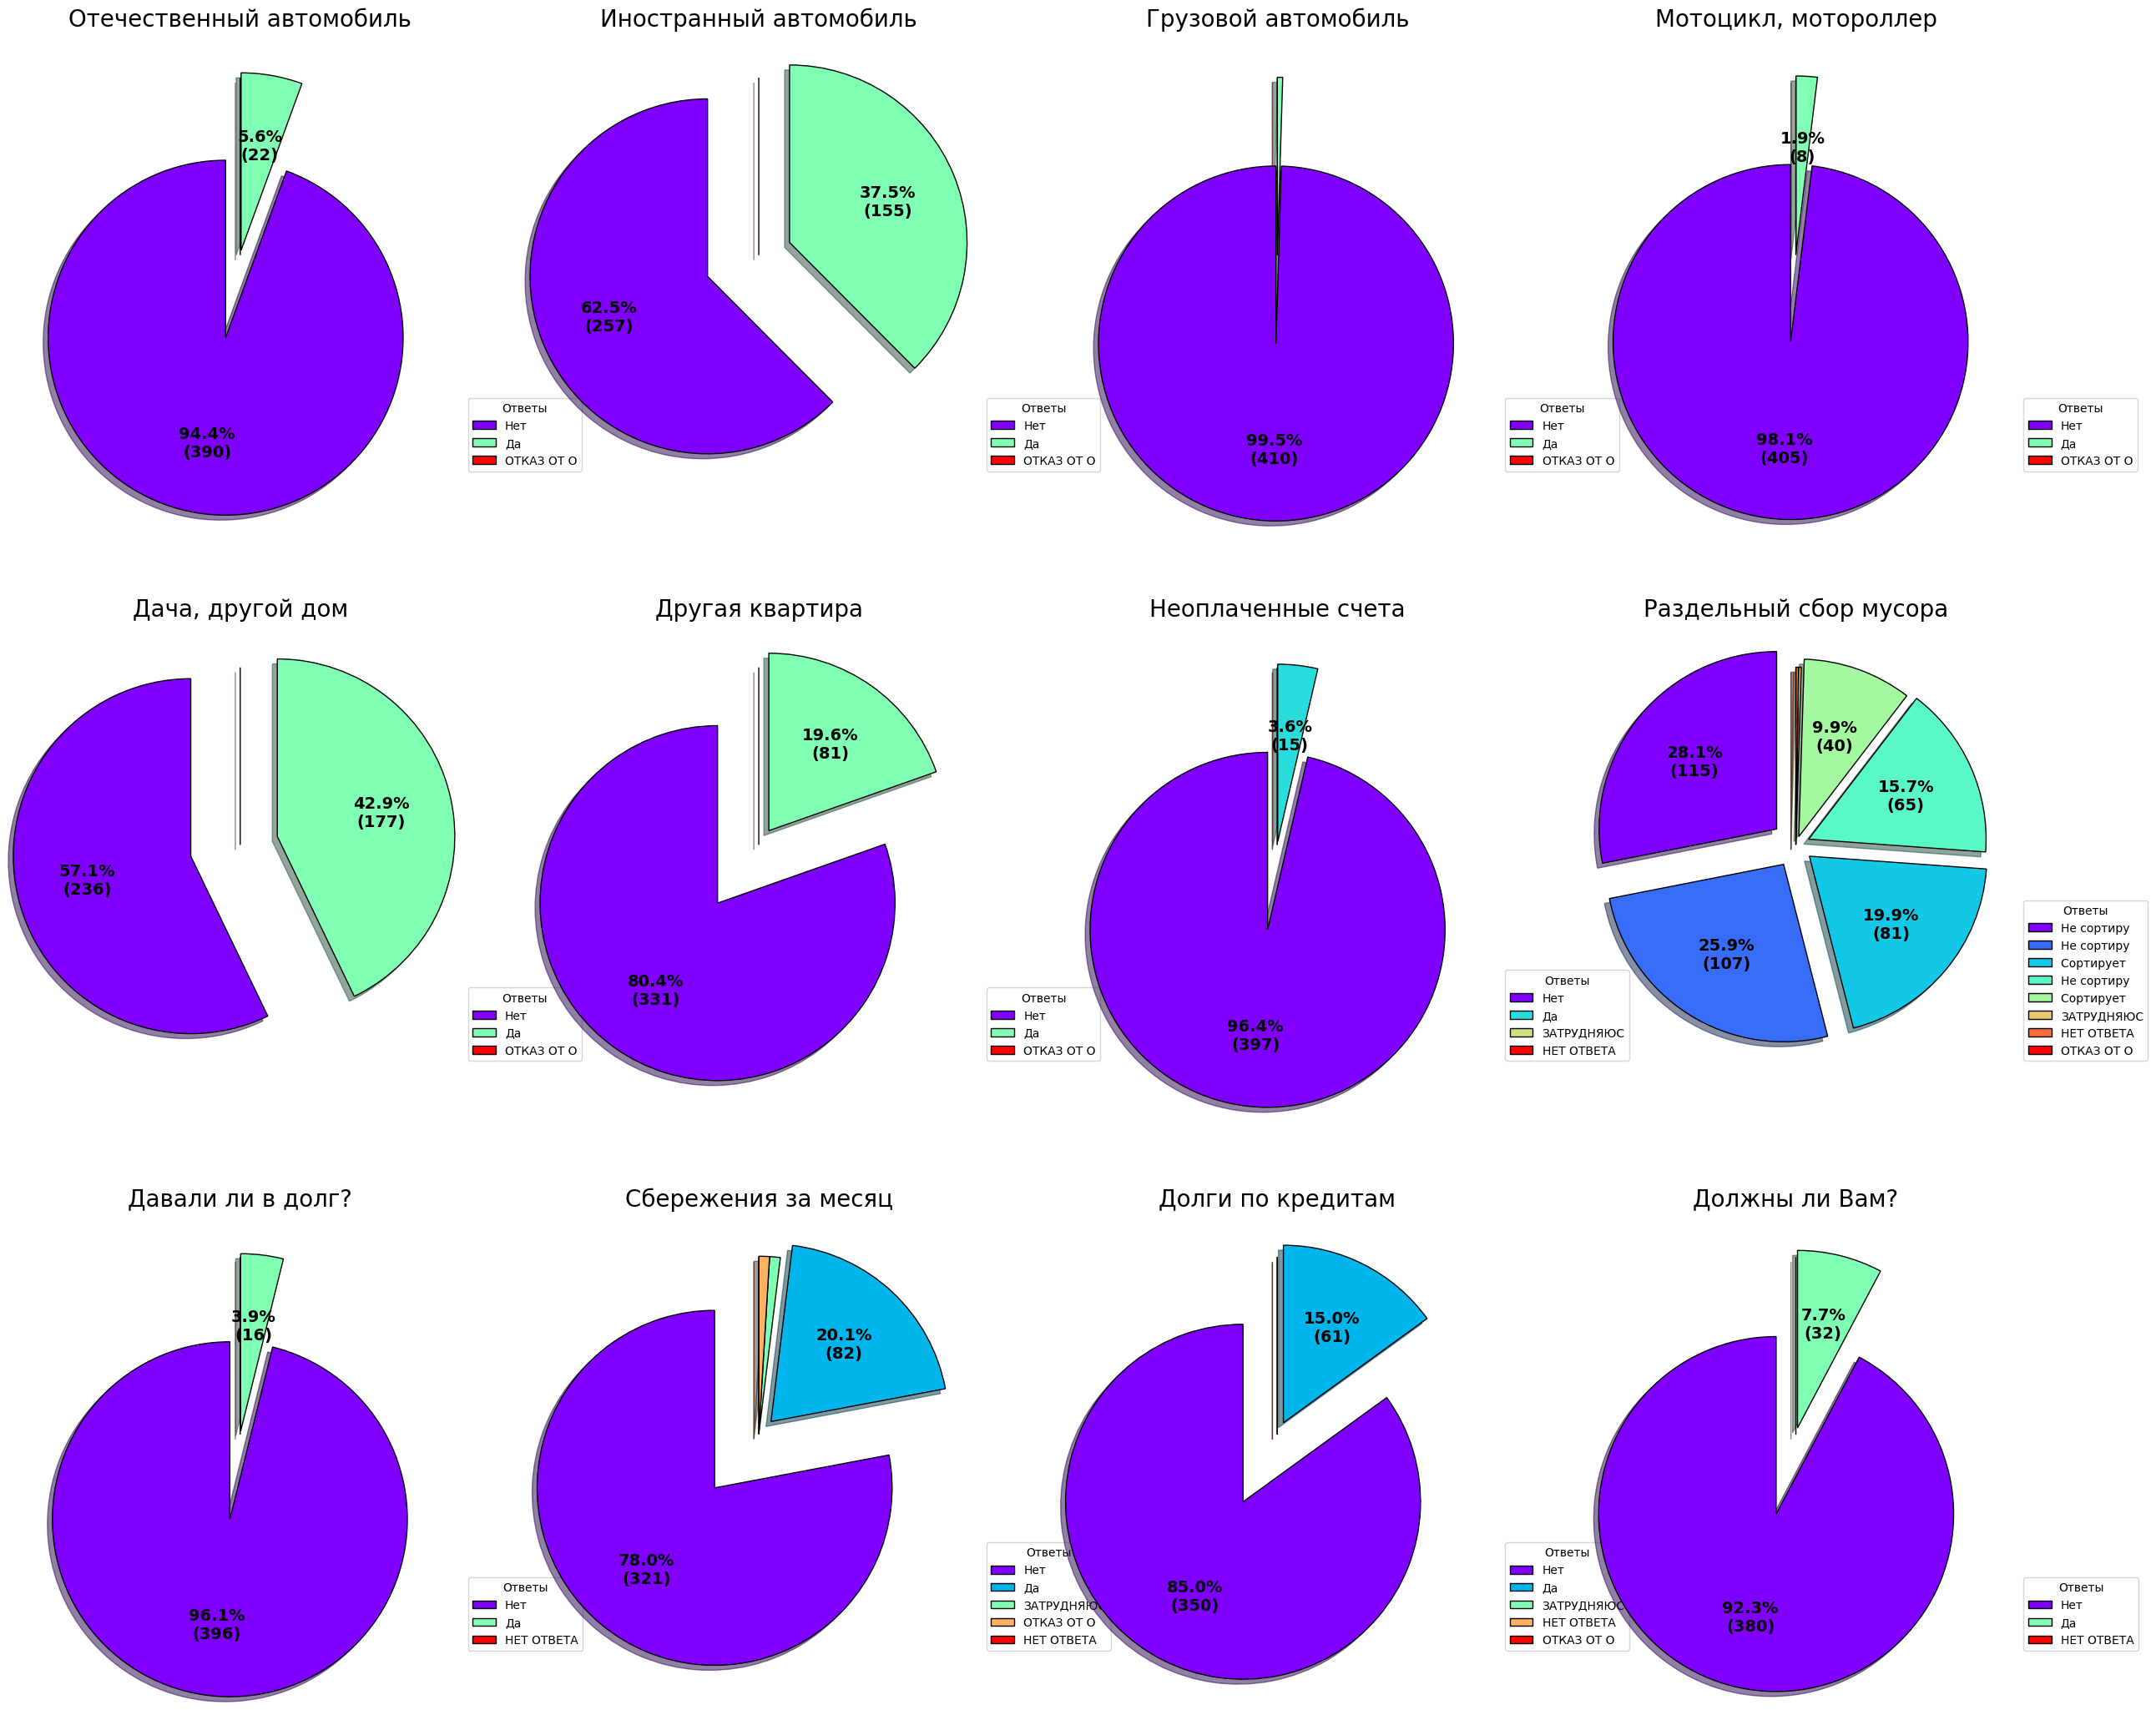

In [173]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    if pct > 1.:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ''
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
# Creating plot
fig, ax = plt.subplots(3, 4, figsize =(25, 25))
for i, (col, title) in enumerate(zip(pie_cols, cols_pie_names)):
    vc = good_data[col].value_counts()
    data = vc.values.astype(int)
    labels = [st[:10] for st in good_data[col].value_counts().keys().astype(str)] 
    sum_ = good_data[col].value_counts().values.sum()
    explode = [i / sum_ / 2 for i in data]
    wp = { 'linewidth' : 1, 'edgecolor' : "black" }

    wedges, texts, autotexts = ax[i // 4][i % 4].pie(data, 
            autopct = lambda pct: func(pct, data), 
            explode=explode,
            wedgeprops=wp,
            colors=mcp.gen_color(cmap="rainbow",n=len(labels)),
            shadow=True,
            startangle=90)
    ax[i // 4][i % 4].legend(wedges, labels,
          title ="Ответы",
          loc ="lower left",
          bbox_to_anchor =(1, 0, 0.5, 1))
    ax[i // 4][i % 4].set_aspect('equal')
    ax[i // 4][i % 4].set_title(title, fontdict={'fontsize': 20})
    plt.setp(autotexts, size = 14, weight ="bold", color="black")
    plt.subplots_adjust(wspace=-10, hspace=None)
plt.tight_layout()

In [195]:
num_cols = list(set(good_data.columns) - set(pie_cols))

In [200]:
good_data.shape

(413, 22)

In [822]:
numerical_data = good_data[num_cols].drop(columns=["zf12_a"])

In [218]:
bad_ans = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "ЖИЛЬЕ ПРОДАТЬ НЕВОЗМОЖНО", "ЖИЛЬЕ НЕ ПОДЛЕЖИТ ПРОДАЖЕ", "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]

In [233]:
numerical_data

,z_nfm,zc6,ze11,ze1.1c,zc1.1,ze4,zc5,zf14,ze9.8b
3747,1.0,38.0,6000.0,NaN,8000000.0,20000.0,23.5,30222.0,2000.0
3748,2.0,48.3,3200.0,45.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,20000.0,17.3,47300.0,400.0
3749,5.0,49.4,6000.0,200.0,8000000.0,36400.0,38.0,190215.0,3000.0
3750,1.0,34.6,1500.0,32.0,ЖИЛЬЕ НЕ ПОДЛЕЖИТ ПРОДАЖЕ,10000.0,20.0,30600.0,NaN
3751,1.0,42.4,2800.0,80.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,10000.0,28.5,36000.0,200.0
...,...,...,...,...,...,...,...,...,...
4776,6.0,36.8,7000.0,800.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,50000.0,19.2,ОТКАЗ ОТ ОТВЕТА,3000.0
4777,2.0,64.8,5500.0,90.0,8000000.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,43.8,44300.0,200.0
4778,1.0,75.0,5000.0,40.0,17000000.0,8000.0,37.0,24000.0,300.0
4779,6.0,55.0,5800.0,200.0,17000000.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,29.0,210000.0,1400.0


In [235]:
num_cols_pd = [
    numerical_data[~numerical_data[col].isin(bad_ans)][col] for col in numerical_data.columns]

In [240]:
for col in numerical_data.columns:
    print(col, cols_with_description[col])

z_nfm Количество членов семьи
zc6 Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)?
ze11 Сколько рублей Ваша семья фактически заплатила в течение последних 30 дней за квартиру, включая аренду, и коммунальные услуги?
ze1.1c Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб?
zc1.1 Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?
ze4 Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней?
zc5 Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат?
zf14 Денежный ДОХОД
ze9.8b Сколько всего рублей Ваша семья заплатила за услуги мобильной сотовой связи? 


In [447]:
income_pd = num_cols_pd[-2].astype(str).astype(float)

In [448]:
outcome_data = ['ze1.1c', 'ze4', 'ze9.8b', 'ze11']

In [449]:
numerical_data["outcome_eat"] = numerical_data[outcome_data]['ze4'].apply(lambda row: None if row in bad_ans else row)
numerical_data["outcome_bread"] = numerical_data[outcome_data]['ze1.1c'].apply(lambda row: None if row in bad_ans else row)
numerical_data["outcome_mobile"] = numerical_data[outcome_data]['ze9.8b'].apply(lambda row: None if row in bad_ans else row)
numerical_data["outcome_flat"] = numerical_data[outcome_data]['ze11'].apply(lambda row: None if row in bad_ans else row)
outcome_data = ["outcome_eat", "outcome_bread", "outcome_mobile", "outcome_flat"]

In [450]:
outcome_data_with_desc = {
    "outcome_eat": "Траты на еду", 
    "outcome_bread": "Траты на белый хлеб", 
    "outcome_mobile": "Траты на мобильную связь", 
    "outcome_flat": "Траты на квартиру"
}


In [451]:
numerical_data["final_outcome"] = numerical_data[outcome_data[0]] + numerical_data[outcome_data[1]]  + numerical_data[outcome_data[2]] + numerical_data[outcome_data[3]]

Text(0.5, 1.0, 'Распределение логарифма затрат')

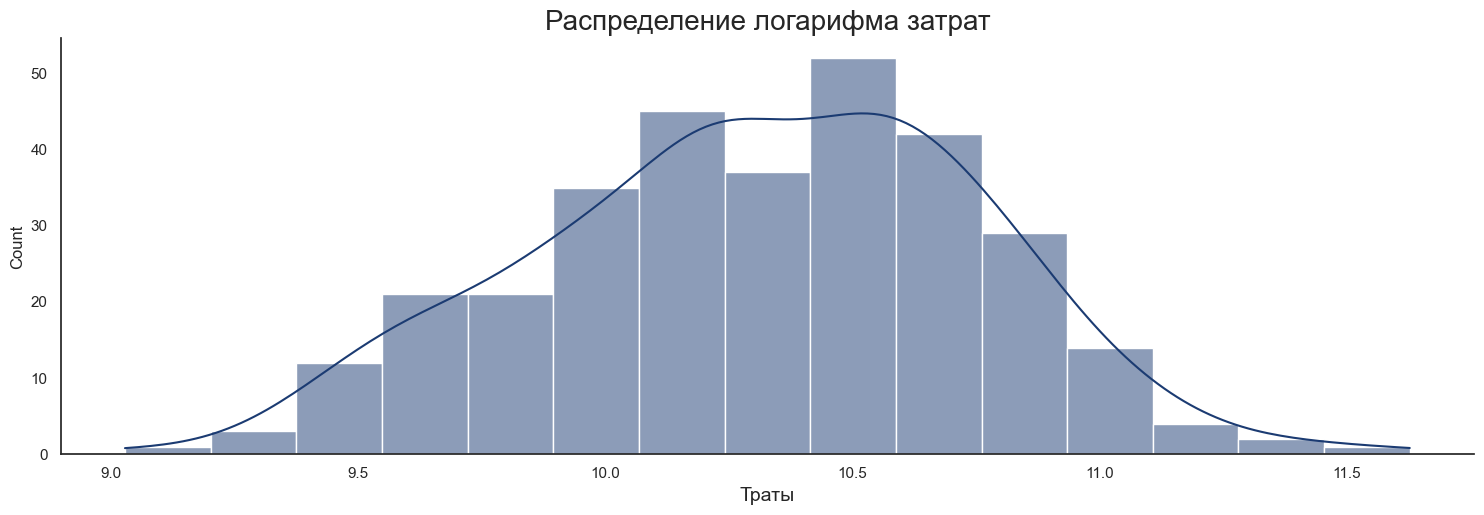

In [490]:
%matplotlib inline
sns.set()
sns.set_style(style='white')
sns.displot(np.log(numerical_data["final_outcome"]), height=5, aspect=3, color=sns.color_palette('bright')[0], kde=True);
plt.xlabel("Траты", fontdict={"fontsize": 14})
plt.title("Логарифм трат", fontdict={"fontsize": 20})

In [458]:
for_kstest.dropna()

3748    10.070907
3749    10.727663
3751     9.478840
3753    10.539535
3754    10.159292
          ...    
4774    10.174430
4775    11.068901
4776    11.015345
4778     9.498522
4780    10.293839
Name: final_outcome, Length: 319, dtype: float64

In [468]:
for_kstest = np.log(numerical_data["final_outcome"]).dropna()

from scipy.stats import kstest, shapiro
my_args = ["", 0, ""]
print(shapiro(for_kstest))
# kstest(for_kstest, 'lognorm', args=my_args)

ShapiroResult(statistic=0.9936439394950867, pvalue=0.1998792290687561)


c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Логарифмы распределения трат по типам')

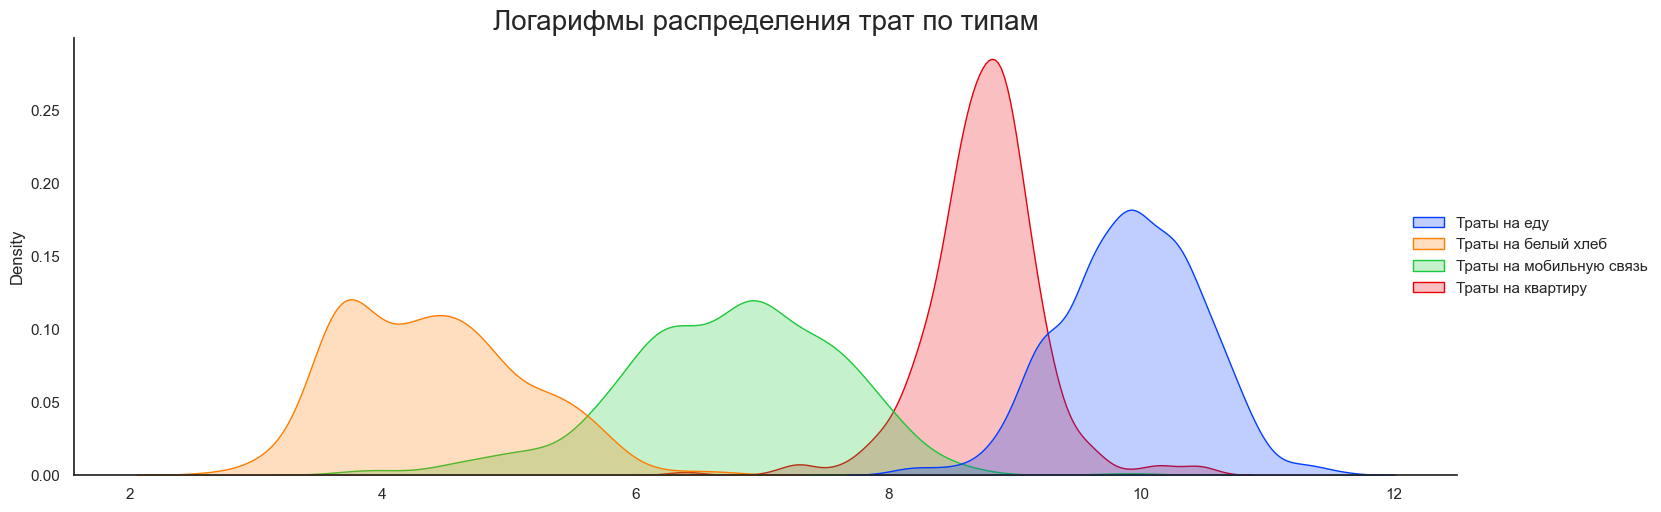

In [414]:
sns.set()
sns.set_style(style='white')
chart = sns.displot(np.log(numerical_data[outcome_data]), height=5, aspect=3, kind="kde",palette=sns.color_palette('bright')[:4], fill=True);
for t, l in zip(chart._legend.texts, outcome_data_with_desc.values()):
    t.set_text(l)
plt.title("Логарифмы распределения трат по типам", fontdict={"fontsize": 20})

Text(0, 0.5, 'Денежный доход')

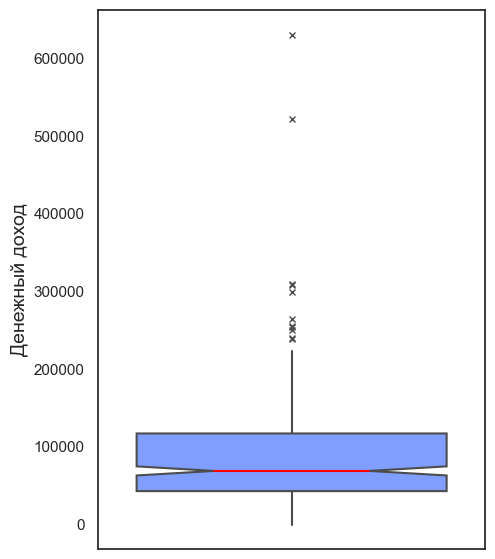

In [500]:
plt.figure(figsize=(5,7))
sns.boxplot(y=income_pd, notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": "#809eff"},
    medianprops={"color": "red"})
plt.ylabel("Денежный доход", fontdict={"fontsize": 14})

Text(0.5, 0, 'Денежный доход')

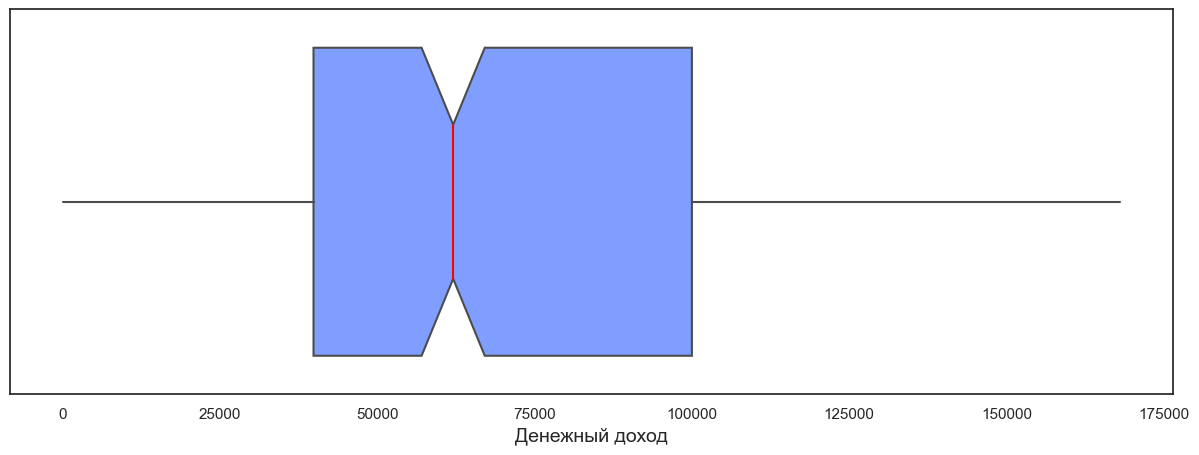

In [501]:
def hampel(vals_orig):
    vals = vals_orig.copy()    
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)
plt.figure(figsize=(15,5))
sns.boxplot(x=hampel(income_pd).dropna(), notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": "#809eff"},
    medianprops={"color": "red"})
# plt.title("Ящик с усами для денежного дохода", fontdict={"fontsize": 20})
plt.xlabel("Денежный доход", fontdict={"fontsize": 14})


Text(0.5, 1.0, 'Распределение денежного дохода')

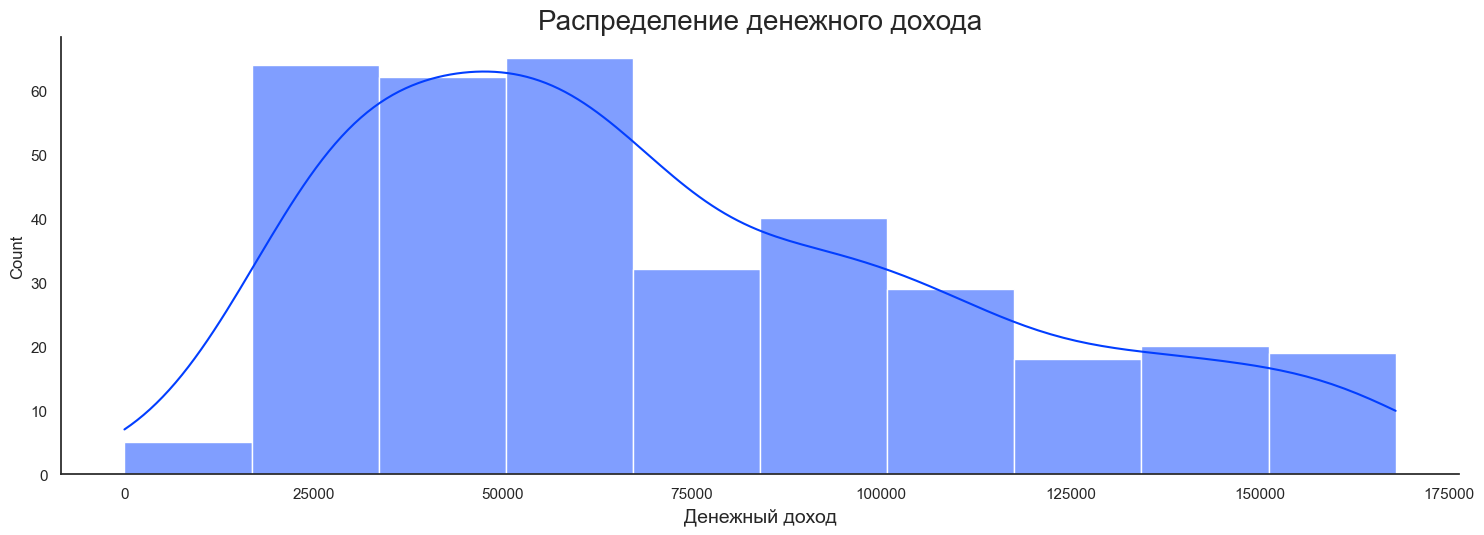

In [504]:
sns.set()
sns.set_style(style='white')
sns.displot(hampel(income_pd).dropna().values, height=5, aspect=3, color=sns.color_palette('bright')[0], kde=True);
plt.xlabel("Денежный доход", fontdict={"fontsize": 14})
plt.title("Распределение денежного дохода", fontdict={"fontsize": 20})

In [439]:
outcome_data.append('final_outcome')
numerical_data = numerical_data.drop(columns=outcome_data).isna().sum().sum()

In [446]:
numerical_data = numerical_data.dropna()

In [545]:
pie_cols

['zc9.7.2a',
 'zc9.7.3a',
 'zc9.7.1a',
 'zc9.8a',
 'zc9.101a',
 'zc9.12a',
 'ze12',
 'ze44',
 'ze14',
 'ze16',
 'zf14.8',
 'zf14.12']

In [566]:
import statsmodels.api as sm

from statsmodels.stats.proportion import multinomial_proportions_confint

In [561]:
ds = {"Признак": [], "Левая\\граница": [], "Правая\\граница": []}
col = pie_cols[0]
# for key, value in dict(good_data[col].value_counts()).items():
#     ds["Признак"].append(cols_with_description[col] + f"\\{key}")
#     left, right = proportion

In [585]:
pie_cols

['zc9.7.2a',
 'zc9.7.3a',
 'zc9.7.1a',
 'zc9.8a',
 'zc9.101a',
 'zc9.12a',
 'ze12',
 'ze44',
 'ze14',
 'ze16',
 'zf14.8',
 'zf14.12']

In [577]:
i = 0


In [595]:
col = pie_cols[i]
counts = list(dict(good_data[col].value_counts()).values())
print(col, cols_with_description[col])
print(multinomial_proportions_confint(counts))
print(multinomial_proportions_confint(counts, alpha=0.01))
i+=1
good_data[col].value_counts()

zf14.12 Должны ли Вашей семье?
[[0.88492698 0.94854339]
 [0.05145661 0.11507302]
 [0.         0.01368692]]
[[0.87470331 0.95306532]
 [0.04693468 0.12529669]
 [0.         0.02043425]]


Нет           381
Да             32
НЕТ ОТВЕТА      0
Name: zf14.12, dtype: int64

In [607]:
outcome_data.append('final_outcome')

In [671]:
data_for_hypothesises = numerical_data[~numerical_data["zf14"].astype(str).isin(bad_ans)].drop(columns=outcome_data)

In [672]:
huge_pop = data_for_hypothesises[data_for_hypothesises['z_nfm'] >= 3]

In [673]:
small_pop = data_for_hypothesises[data_for_hypothesises['z_nfm'] <= 2]

In [674]:
data_for_hypothesises["Объем семьи"] = data_for_hypothesises["z_nfm"].apply(lambda x: 'Одинокий' if x == 1 else 'Средняя семья' if x < 4 else "Объемная семья")

In [676]:
data_for_hypothesises["zf14"] = data_for_hypothesises["zf14"].astype(str).astype(float)

In [678]:
data_for_hypothesises["zf14"] = hampel(data_for_hypothesises["zf14"])

In [682]:
data_for_hypothesises = data_for_hypothesises.dropna()

In [683]:
data_for_hypothesises["log_income"] = np.log(data_for_hypothesises["zf14"])

c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1521283751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_hypothesises["log_income"] = np.log(data_for_hypothesises["zf14"])


In [697]:
pg.normality(data_for_hypothesises, dv="zf14", group="Объем семьи", method='shapiro', alpha=0.00001)

,W,pval,normal
Средняя семья,0.926347,0.000001,False
Одинокий,0.921934,0.000158,True
Объемная семья,0.973780,0.137331,True


In [ ]:
sns.set()
sns.set_style(style='white')
chart = sns.displot(data_for_hypothesises["zf14"], height=5, aspect=3, kind="kde",palette=sns.color_palette('bright')[:4], fill=True);
for t, l in zip(chart._legend.texts, outcome_data_with_desc.values()):
    t.set_text(l)
plt.title("Логарифмы распределения трат по типам", fontdict={"fontsize": 20})

In [ ]:
sns.set()
sns.set_style(style='white')
chart = sns.displot(np.log(numerical_data[outcome_data]), height=5, aspect=3, kind="kde",palette=sns.color_palette('bright')[:4], fill=True);
for t, l in zip(chart._legend.texts, outcome_data_with_desc.values()):
    t.set_text(l)
plt.title("Логарифмы распределения трат по типам", fontdict={"fontsize": 20})

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1423309356.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


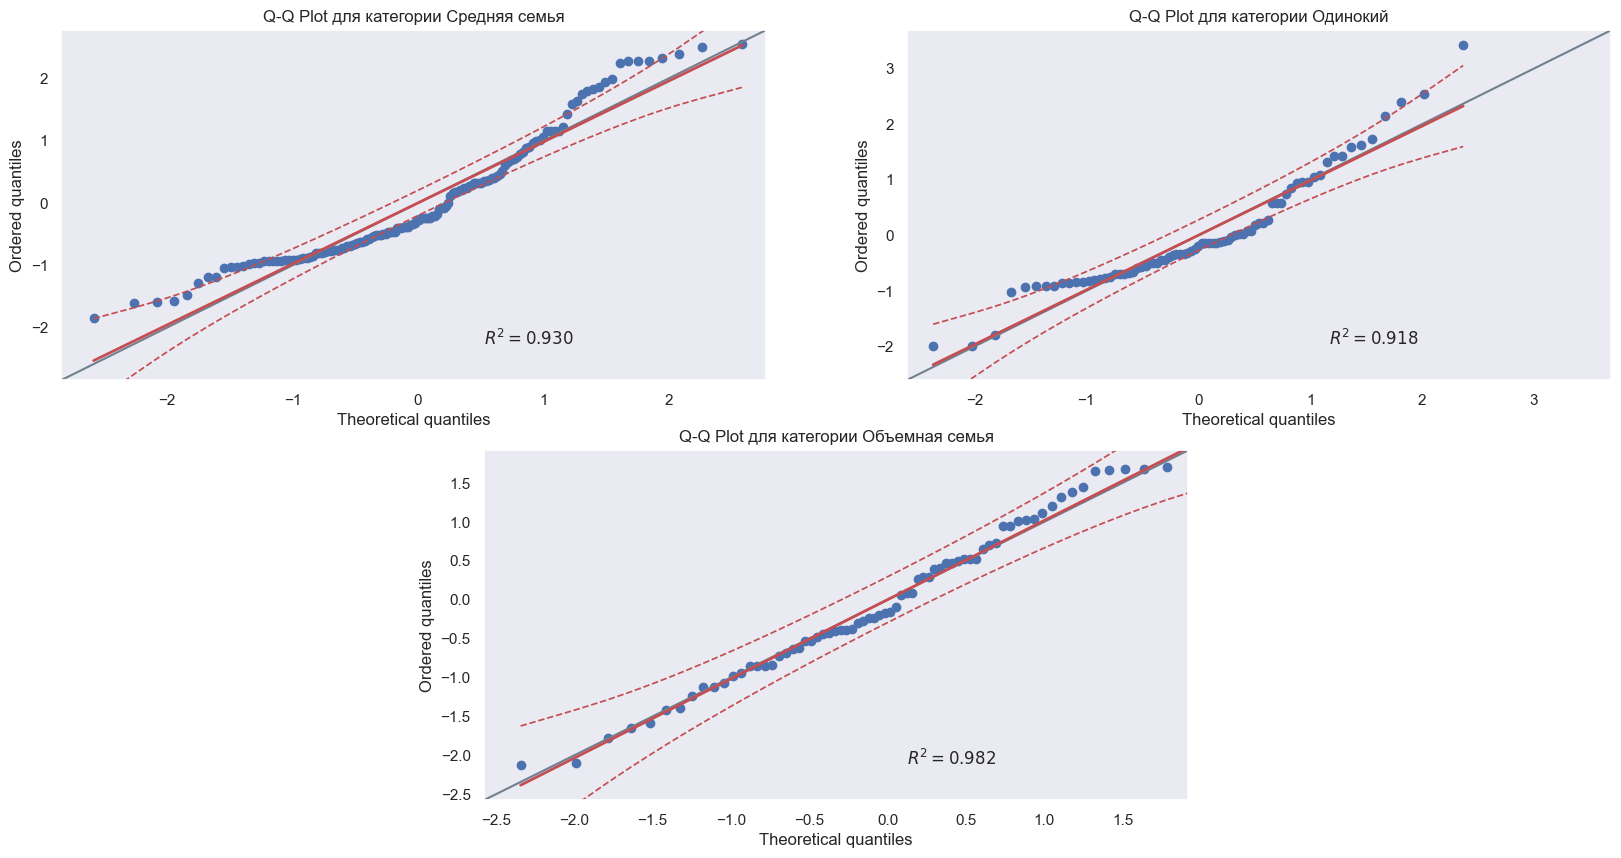

In [706]:
# fig, axes = plt.subplots(2, 2, figsize = (10, 8), gridspec_kw={'width_ratios': [1, 3]})
# axes[1,1].set_axis_off()
import matplotlib.gridspec as gridspec

plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 1:3])
axes = [ax1, ax2, ax3]
sns.set()
categories = data_for_hypothesises["Объем семьи"].unique()
for ax, cat in zip(axes, categories):
    mask = data_for_hypothesises["Объем семьи"] == cat
    sample = data_for_hypothesises.loc[mask, "zf14"]
    pg.qqplot(sample, ax=ax)
    ax.set_title(f"Q-Q Plot для категории {cat}")
    ax.grid(False)
plt.tight_layout()

In [707]:
pg.homoscedasticity(data_for_hypothesises, dv="zf14", group="Объем семьи", method='levene')

,W,pval,equal_var
levene,12.629967,0.000006,False


In [708]:
pg.welch_anova(data_for_hypothesises, dv="zf14", between="Объем семьи")

c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:1341: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_res = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,Объем семьи,2,165.333277,167.043918,2.047384e-40,0.444963


In [727]:
data_for_hypothesises = data_for_hypothesises.drop(index = data_for_hypothesises[data_for_hypothesises["log_income"] == float('-inf')].index)

In [728]:
pg.pairwise_gameshowell(data_for_hypothesises, dv="log_income", between="Объем семьи")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Объемная семья,Одинокий,11.633350,10.481141,1.152209,0.066913,17.219548,128.512046,0.000000e+00,2.826360
1,Объемная семья,Средняя семья,11.633350,11.168408,0.464942,0.054260,8.568803,195.426122,0.000000e+00,1.235309
2,Одинокий,Средняя семья,10.481141,11.168408,-0.687268,0.068119,-10.089275,147.607570,3.930190e-14,-1.435144


In [623]:
xs = huge_pop["zf14"].astype(str).astype(float)
ys = small_pop["zf14"].astype(str).astype(float)

In [632]:
from statsmodels.stats import weightstats

weightstats.ztest(xs, ys, alternative="two-sided")

(10.220400301630695, 1.6067597799751673e-24)

In [729]:
results = st.ttest_ind(
    xs, ys,
    equal_var=False) # Так как нормальность не соблюдается
alpha = 0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.86827641446162e-21
Отвергаем нулевую гипотезу


In [731]:
data_for_hypothesises["zf14"].mean()

78338.85467128028

In [732]:
st.ttest_1samp(data_for_hypothesises["zf14"], 83100)

Ttest_1sampResult(statistic=-1.9101592019839553, pvalue=0.05710583123181975)

In [760]:
xs = st.t.rvs(df=data_for_hypothesises.shape[0], size=10000)

In [805]:
st.t.cdf(xs, df=289).max()

0.9999341852080467

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1932641092.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(xs, kde=True, height=5, aspect=1.5, palette=sns.color_palette('bright')[0])


<Figure size 1500x1000 with 0 Axes>

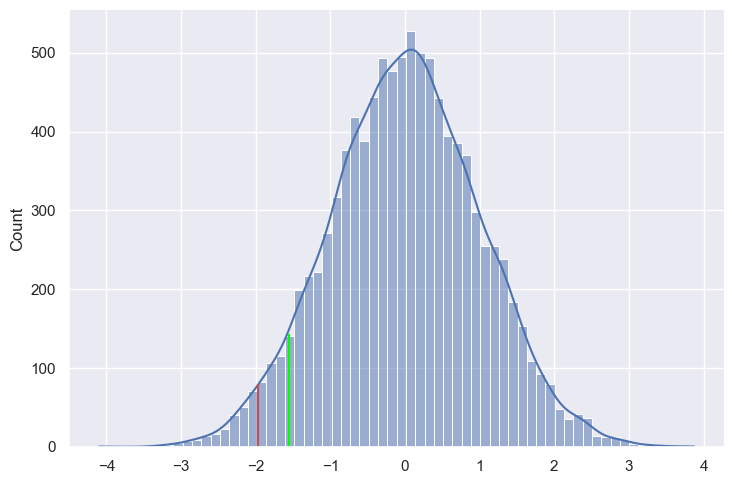

In [811]:
plt.figure(figsize=(15,10))
sns.displot(xs, kde=True, height=5, aspect=1.5, palette=sns.color_palette('bright')[0])
plt.vlines(x=-1.97, ymin=0, ymax=80, color='r')
plt.vlines(x=-1.56, ymin=0, ymax=143, color='lime')
# plt.fill_between(np.linspace(-4, -2.8, 10000), xs, color='lime')
# sns.lineplot(x=)

In [527]:
import scipy.stats as st

for col in num_cols_pd:
    print(col.name, cols_with_description[col.name], st.norm.interval(confidence=0.99, loc=np.mean(col.astype(str).astype(float).dropna()), scale=st.sem(col.astype(str).astype(float).dropna())))

z_nfm Количество членов семьи (2.368913054592179, 2.749731013204431)
zc6 Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)? (51.2732937202252, 55.201216083696366)
ze11 Сколько рублей Ваша семья фактически заплатила в течение последних 30 дней за квартиру, включая аренду, и коммунальные услуги? (6528.272690195901, 7514.601415597548)
ze1.1c Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб? (92.5233781117313, 117.39684980849661)
zc1.1 Какова сегодня приблизительно рыночная цена такого жилья, как Ваше? (8710760.1640285, 10245811.26454293)
ze4 Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней? (21644.468095156943, 24974.078270757844)
zc5 Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат? (32.51327286598671, 35.6032

In [817]:
for col in numerical_data.columns:
    print(col, cols_with_description[col])

z_nfm Количество членов семьи
zc6 Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)?
ze11 Сколько рублей Ваша семья фактически заплатила в течение последних 30 дней за квартиру, включая аренду, и коммунальные услуги?
ze1.1c Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб?
zc1.1 Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?
ze4 Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней?
zc5 Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат?
zf14 Денежный ДОХОД
ze9.8b Сколько всего рублей Ваша семья заплатила за услуги мобильной сотовой связи? 


In [819]:
for col in numerical_data.columns:
    numerical_data = numerical_data[~numerical_data[col].astype(str).isin(bad_ans)]

In [826]:
numerical_data = numerical_data.dropna()

In [827]:
data_for_correlation = numerical_data.copy()

In [830]:
for col in numerical_data.columns:
    data_for_correlation[col] = numerical_data[col].apply(lambda row: None if row in bad_ans else row)

In [834]:
data_for_correlation = data_for_correlation.dropna()

In [835]:
for col in data_for_correlation.columns:
    data_for_correlation[col] = data_for_correlation[col].astype(str).astype(float)

In [837]:
data_for_correlation.corr()

,z_nfm,zc6,ze11,ze1.1c,zc1.1,ze4,zc5,zf14,ze9.8b
z_nfm,1.000000,0.199834,0.151016,0.447384,0.060581,0.773852,0.278906,0.575003,0.671853
zc6,0.199834,1.000000,-0.054644,0.068799,0.617863,0.047148,0.883905,0.149422,0.105320
ze11,0.151016,-0.054644,1.000000,0.022891,0.309114,0.066731,-0.002900,0.145372,0.046649
ze1.1c,0.447384,0.068799,0.022891,1.000000,0.091956,0.388213,0.124857,0.170101,0.168681
zc1.1,0.060581,0.617863,0.309114,0.091956,1.000000,0.010839,0.489504,0.044256,-0.118440
ze4,0.773852,0.047148,0.066731,0.388213,0.010839,1.000000,0.113828,0.600522,0.511407
zc5,0.278906,0.883905,-0.002900,0.124857,0.489504,0.113828,1.000000,0.208283,0.138829
zf14,0.575003,0.149422,0.145372,0.170101,0.044256,0.600522,0.208283,1.000000,0.552880
ze9.8b,0.671853,0.105320,0.046649,0.168681,-0.118440,0.511407,0.138829,0.552880,1.000000


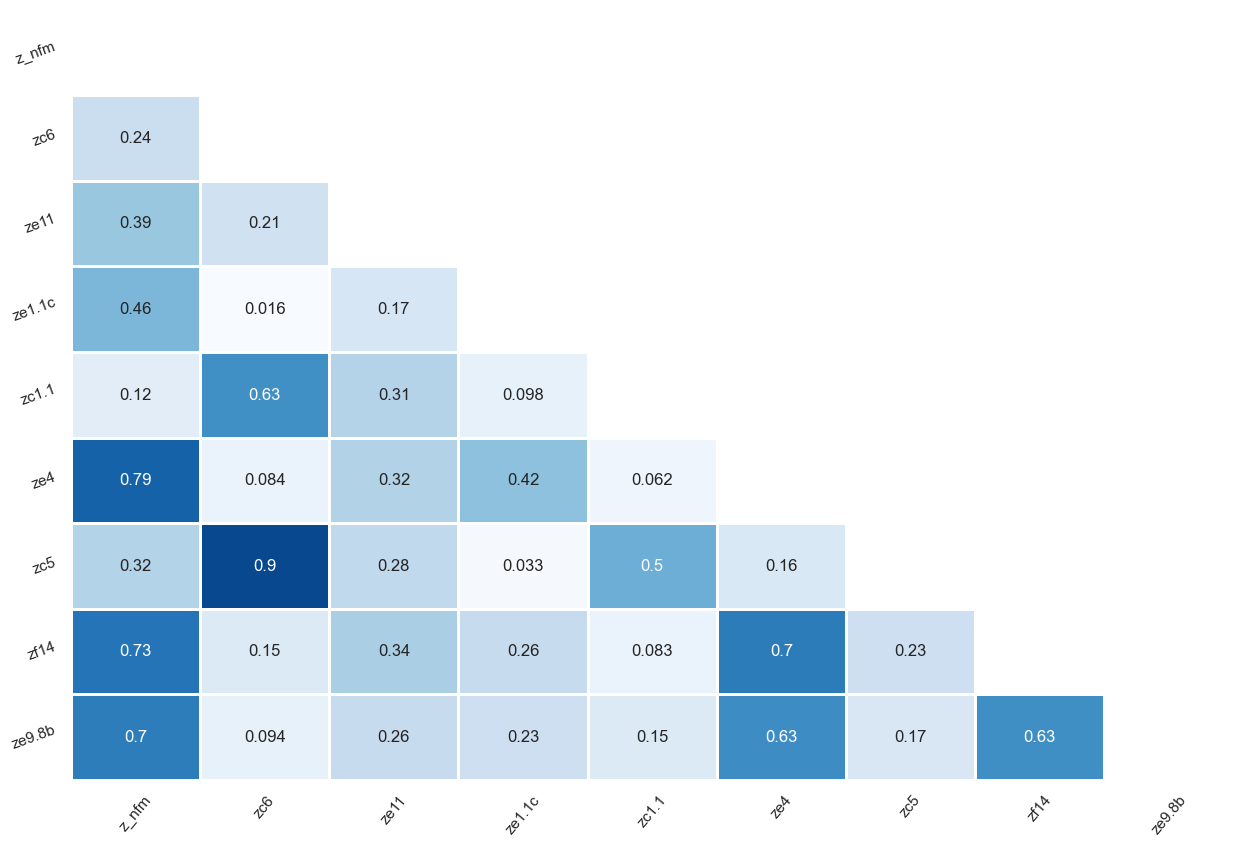

In [839]:
cor_matrix = data_for_correlation.corr(method='spearman').abs()
lower_triangle = cor_matrix.where(np.tril(np.ones(cor_matrix.shape), k=-1).astype(bool))
plt.figure(figsize =(15,10))
sns.set_style(style='white')
sns.heatmap(lower_triangle, 
            center=0.5, cmap= 'Blues',
            annot= True, xticklabels = cor_matrix.index,
            yticklabels = cor_matrix.columns,
            cbar= False, linewidths= 1, mask =(lower_triangle==0))
plt.xticks(rotation = 50)
plt.yticks(rotation = 20) 
plt.show()

In [841]:
for col in good_data.columns:
    good_data[col] = good_data[col].apply(lambda row: None if row in bad_ans else row)

In [862]:
good_data.isna().sum()

z_nfm        0
zc1.1        0
zc6          0
zc5          0
zc9.7.2a     0
zc9.7.3a     0
zc9.7.1a     0
zc9.8a       0
zc9.101a     0
zc9.12a      0
ze4          0
ze9.8b      13
ze11        16
ze12         0
ze44         0
ze14         0
ze16         0
zf12_a       0
zf14.8       0
zf14.12      0
zf14         0
dtype: int64

In [861]:
good_data = good_data.drop(columns=['ze1.1c', 'ze1.31c', 'ze1.45c', 'ze9.9b'])

In [864]:
good_data = good_data.dropna()

In [867]:
good_data

,z_nfm,zc1.1,zc6,zc5,zc9.7.2a,zc9.7.3a,zc9.7.1a,zc9.8a,zc9.101a,zc9.12a,...,ze9.8b,ze11,ze12,ze44,ze14,ze16,zf12_a,zf14.8,zf14.12,zf14
3747,1.0,8000000.0,38.0,23.5,Нет,Нет,Нет,Нет,Да,Нет,...,2000.0,6000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Не больше недели,Нет,Нет,30222.0
3748,2.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,48.3,17.3,Нет,Нет,Нет,Нет,Нет,Нет,...,400.0,3200.0,Нет,Сортирует пищевой и непищевой мусор,Нет,Нет,Не больше двух недель,Да,Нет,47300.0
3749,5.0,8000000.0,49.4,38.0,Нет,Нет,Нет,Нет,Да,Нет,...,3000.0,6000.0,Нет,"Не сортирует, так как не считает нужным",Нет,Нет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Нет,Нет,190215.0
3751,1.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,42.4,28.5,Нет,Нет,Нет,Нет,Нет,Нет,...,200.0,2800.0,Нет,"Не сортирует, но хотела бы",Нет,Нет,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Нет,Нет,36000.0
3753,3.0,7000000.0,32.0,18.0,Нет,Нет,Нет,Нет,Нет,Да,...,1000.0,6500.0,Нет,"Не сортирует, так как не считает нужным",Нет,Нет,Не больше месяца,Нет,Нет,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,6.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,36.8,19.2,Нет,Нет,Нет,Нет,Нет,Нет,...,3000.0,7000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Несколько месяцев,Нет,Да,ОТКАЗ ОТ ОТВЕТА
4777,2.0,8000000.0,64.8,43.8,Нет,Да,Нет,Нет,Да,Нет,...,200.0,5500.0,Нет,Сортирует пищевой и непищевой мусор,Нет,Нет,Не больше месяца,Нет,Нет,44300.0
4778,1.0,17000000.0,75.0,37.0,Нет,Нет,Нет,Нет,Да,Нет,...,300.0,5000.0,Нет,"Не сортирует, так как не считает нужным",Нет,Нет,Несколько месяцев,Нет,Нет,24000.0
4779,6.0,17000000.0,55.0,29.0,Нет,Да,Нет,Нет,Да,Нет,...,1400.0,5800.0,Нет,"Не сортирует, но хотела бы",Нет,Нет,Несколько месяцев,Нет,Нет,210000.0


In [870]:
very_bad = ['ЖИЛЬЕ НЕ ПОДЛЕЖИТ ПРОДАЖЕ', "ЖИЛЬЕ ПРОДАТЬ НЕВОЗМОЖНО",
            "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]

In [868]:
y_reg_flat_cost = good_data["zc1.1"]

In [ ]:
X_reg_flat_cost = good_data[["zc6", "ze11", "zc5", "zf14"]]


In [875]:
reg_data = good_data.copy()

In [877]:
reg_data["zc1.1"] = reg_data["zc1.1"].apply(lambda row: None if row in very_bad else row)

In [879]:
reg_data = reg_data.dropna()

In [885]:
X_reg_flat_cost = reg_data[~reg_data["zc1.1"].isin(["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", 'nan'])]

In [905]:
# y_reg_flat_cost = X_reg_flat_cost["zc1.1"].astype(str).astype(float)
# X_reg_flat_cost = X_reg_flat_cost[["zc6", "ze11", "zc5", "zf14"]]

In [920]:
y_reg_flat_cost = y_reg_flat_cost.drop(index=ind_to_drop)
X_reg_flat_cost = X_reg_flat_cost.drop(index=ind_to_drop)

In [921]:
assert y_reg_flat_cost.shape[0] == X_reg_flat_cost.shape[0]

In [919]:
ind_to_drop = X_reg_flat_cost[X_reg_flat_cost["zf14"].isin(bad_ans)].index

In [949]:
X_dropped = X_reg_flat_cost.drop(columns=['zc5'])

In [923]:
for col in X_reg_flat_cost.columns:
    X_reg_flat_cost[col] = X_reg_flat_cost[col].astype(str).astype(float)

In [925]:
X_reg_flat_cost.info(), y_reg_flat_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3747 to 4780
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zc6     159 non-null    float64
 1   ze11    159 non-null    float64
 2   zc5     159 non-null    float64
 3   zf14    159 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 159 entries, 3747 to 4780
Series name: zc1.1
Non-Null Count  Dtype  
--------------  -----  
159 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


(None, None)

In [966]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [950]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_reg_flat_cost, test_size=0.3)

In [972]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [973]:
lr.coef_

array([1.64774868e+05, 3.56858707e+01, 4.64478301e-01])

In [974]:
lr.intercept_

284062.4295145646

In [975]:
r2_score(lr.predict(X_test), np.log(y_test))

-21.38455204204369

In [976]:
mean_absolute_error(lr.predict(X_test), y_test)

2763684.3169770767

In [992]:
recover_data = reg_data[reg_data["zc1.1"] == "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ"]
recover_data[["zc6", "ze11", "zf14"]]

,zc6,ze11,zf14
3748,48.3,3200.0,47300.0
3751,42.4,2800.0,36000.0
3754,44.9,7000.0,48034.0
3758,37.3,6500.0,25478.0
3759,48.6,7800.0,71000.0
...,...,...,...
4769,49.7,5400.0,46800.0
4770,69.0,8000.0,221300.0
4771,58.0,7000.0,122000.0
4772,59.0,6000.0,22000.0


In [1005]:
reg_data[reg_data["zc1.1"] == "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ"].shape, recover_data['zc1.1'].shape

((177, 21), (177,))

In [1014]:
indices = reg_data[reg_data["zc1.1"] == "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ"]['zc1.1'].index

In [1011]:
reg_data["check"] = recover_data["zc1.1"]

In [1017]:
reg_data.loc[indices, "zc1.1"] = recover_data["zc1.1"]

In [1000]:
recover_data['zc1.1'] = lr.predict(recover_data[["zc6", "ze11", "zf14"]])

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1716043168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recover_data['zc1.1'] = lr.predict(recover_data[["zc6", "ze11", "zf14"]])


In [998]:
recover_data[["zc6", "ze11", "zf14"]], recover_data['zc1.1']

(       zc6    ze11      zf14
 3748  48.3  3200.0   47300.0
 3751  42.4  2800.0   36000.0
 3754  44.9  7000.0   48034.0
 3758  37.3  6500.0   25478.0
 3759  48.6  7800.0   71000.0
 ...    ...     ...       ...
 4769  49.7  5400.0   46800.0
 4770  69.0  8000.0  221300.0
 4771  58.0  7000.0  122000.0
 4772  59.0  6000.0   22000.0
 4773  42.6  7000.0   59000.0
 
 [177 rows x 3 columns],
 3748    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 3751    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 3754    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 3758    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 3759    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
                 ...         
 4769    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 4770    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 4771    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 4772    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 4773    ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
 Name: zc1.1, Length: 177, dtype: object)

In [995]:
for col in ["zc6", "ze11", "zf14"]:
    recover_data[col] = recover_data[col].astype(str).astype(float)

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1103601226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recover_data[col] = recover_data[col].astype(str).astype(float)


In [990]:
ind_to_d = recover_data[recover_data["zf14"].isin(bad_ans)].index
# , , "zf14"

In [1053]:
bad_ans.append('nan')

In [1044]:
features = reg_data[["z_nfm", "zc1.1", "zc9.7.3a"]]

In [1070]:
ind_to_drop = reg_data[reg_data["zf14"].isin(bad_ans)].index

In [1058]:
reg_data = reg_data.drop(index=ind_to_drop)
features = features.drop(index=ind_to_drop)

In [1075]:
features = pd.get_dummies(features).drop(columns="zc9.7.3a_ОТКАЗ ОТ ОТВЕТА")

In [1078]:
labels = reg_data["zf14"].astype(str).astype(float)

In [1089]:
labels[labels == 0] = 0.1

In [1090]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [1100]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [1111]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [1112]:
mean_absolute_error(pipe.predict(X_train), np.log(y_train))

0.5583659604043932

In [1129]:
new_data = good_data.drop(columns=["zc1.1"])

In [1136]:
lena = 0
for col in new_data.columns:
    ind_to_drop = new_data[new_data[col].isin(bad_ans)].index
    new_data = new_data.drop(index=ind_to_drop)

In [1140]:
new_data

,z_nfm,zc6,zc5,zc9.7.2a,zc9.7.3a,zc9.7.1a,zc9.8a,zc9.101a,zc9.12a,ze4,ze9.8b,ze11,ze12,ze44,ze14,ze16,zf12_a,zf14.8,zf14.12,zf14
3747,1.0,38.0,23.5,Нет,Нет,Нет,Нет,Да,Нет,20000.0,2000.0,6000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Не больше недели,Нет,Нет,30222.0
3748,2.0,48.3,17.3,Нет,Нет,Нет,Нет,Нет,Нет,20000.0,400.0,3200.0,Нет,Сортирует пищевой и непищевой мусор,Нет,Нет,Не больше двух недель,Да,Нет,47300.0
3753,3.0,32.0,18.0,Нет,Нет,Нет,Нет,Нет,Да,30000.0,1000.0,6500.0,Нет,"Не сортирует, так как не считает нужным",Нет,Нет,Не больше месяца,Нет,Нет,90000.0
3755,2.0,47.0,31.0,Нет,Нет,Нет,Нет,Нет,Да,18000.0,750.0,5000.0,Нет,"Не сортирует, но хотела бы",Нет,Нет,Не больше месяца,Нет,Нет,45000.0
3756,5.0,54.6,48.0,Нет,Да,Нет,Нет,Нет,Нет,50000.0,1500.0,9000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Ни одного дня,Да,Нет,104309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,1.0,42.6,37.0,Нет,Нет,Нет,Нет,Нет,Нет,20000.0,440.0,7000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Несколько месяцев,Нет,Нет,59000.0
4774,1.0,52.0,26.5,Нет,Нет,Нет,Нет,Да,Нет,20000.0,200.0,6000.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Нет,Не больше месяца,Нет,Нет,56800.0
4775,3.0,30.0,18.0,Нет,Да,Нет,Нет,Нет,Да,28000.0,600.0,35500.0,Нет,"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",Нет,Да,Несколько месяцев,Нет,Нет,150000.0
4778,1.0,75.0,37.0,Нет,Нет,Нет,Нет,Да,Нет,8000.0,300.0,5000.0,Нет,"Не сортирует, так как не считает нужным",Нет,Нет,Несколько месяцев,Нет,Нет,24000.0


In [1145]:
for col in new_data[['z_nfm', 'zc6', 'zc5', 'ze4', 'ze9.8b', 'ze11', 'zf14']].columns:
    new_data[col] = new_data[col].astype(str).astype(float)

In [1147]:
for col in new_data:
    if new_data[col].dtype == "category":
        new_data[col] = new_data[col].astype(str)

In [1153]:
cat_cols = [col for col in new_data.columns if new_data[col].dtype == 'object']


In [1155]:
cat_vars1 = tuple(cat_cols)
cat_vars2 = tuple(cat_cols)

In [1157]:
from itertools import product

In [1159]:
cat_var_prod = list(product(cat_vars1,cat_vars2, repeat = 1))

In [1160]:
df_cat = new_data[cat_cols]

In [1186]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(st.chi2_contingency(pd.crosstab(
                            df_cat[i[0]], df_cat[i[1]]), correction=False))[1]))
result

[('zc9.7.2a', 'zc9.7.3a', 0.7888745322921353),
 ('zc9.7.2a', 'zc9.7.1a', 0.7288065472439458),
 ('zc9.7.2a', 'zc9.8a', 1.9977450528390843e-06),
 ('zc9.7.2a', 'zc9.101a', 0.015608403406862162),
 ('zc9.7.2a', 'zc9.12a', 0.10667239103876328),
 ('zc9.7.2a', 'ze12', 0.43262878134428406),
 ('zc9.7.2a', 'ze44', 0.0725665909521664),
 ('zc9.7.2a', 'ze14', 0.38855659048458),
 ('zc9.7.2a', 'ze16', 0.5397010266022115),
 ('zc9.7.2a', 'zf12_a', 0.533395773267531),
 ('zc9.7.2a', 'zf14.8', 0.48171544692443646),
 ('zc9.7.2a', 'zf14.12', 0.712108719345577),
 ('zc9.7.3a', 'zc9.7.2a', 0.7888745322921353),
 ('zc9.7.3a', 'zc9.7.1a', 0.08083964914791246),
 ('zc9.7.3a', 'zc9.8a', 0.17424143952877386),
 ('zc9.7.3a', 'zc9.101a', 2.2805802927833822e-07),
 ('zc9.7.3a', 'zc9.12a', 0.0007214772483596066),
 ('zc9.7.3a', 'ze12', 0.5018885359615595),
 ('zc9.7.3a', 'ze44', 0.05130923738130429),
 ('zc9.7.3a', 'ze14', 0.4605906458314122),
 ('zc9.7.3a', 'ze16', 0.9636346703956752),
 ('zc9.7.3a', 'zf12_a', 0.215877864110079

In [1187]:
chi_test_output = pd.DataFrame(result, columns=['var1', 'var2', 'coeff'])

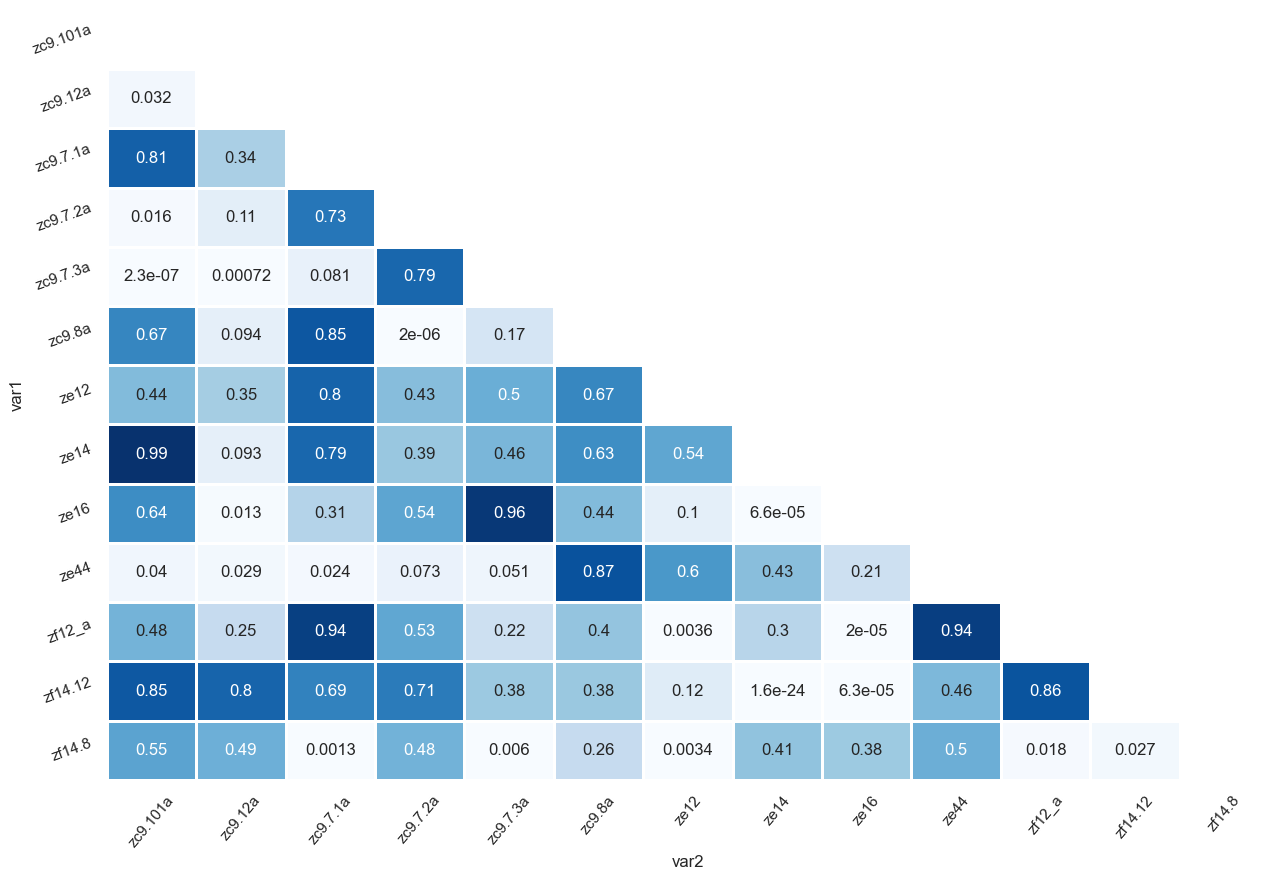

In [1188]:
cor_matrix = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

lower_triangle = cor_matrix.where(np.tril(np.ones(cor_matrix.shape), k=-1).astype(bool))
plt.figure(figsize =(15,10))
sns.set_style(style='white')
sns.heatmap(lower_triangle, 
            center=0.5, cmap= 'Blues',
            annot= True, xticklabels = cor_matrix.index,
            yticklabels = cor_matrix.columns,
            cbar= False, linewidths= 1, mask =(lower_triangle==0))
plt.xticks(rotation = 50)
plt.yticks(rotation = 20) 
plt.show()

In [1207]:
for col in cat_cols:
    print(col, cols_with_description[col])

zc9.7.2a У Вас есть отечественный легковой автомобиль
zc9.7.3a У Вас есть легковой автомобиль иностранной модели? 
zc9.7.1a У Вас есть грузовой автомобиль?
zc9.8a У Вас есть мотоцикл, мотороллер, моторная лодка?
zc9.101a У Вас есть дача или другой дом, часть дома, садовый домик?
zc9.12a У Вас есть другая квартира или часть квартиры?
ze12 Ваша семья имеет неоплаченные счета за жилье, то есть за квартиру и коммунальные услуги?
ze44 Ваша семья практикует дома раздельный сбор мусора?
ze14 Ваша семья в течение последних 30 дней давала деньги в долг?
ze16 Ваша семья в течение последних 30 дней откладывала сбережения?
zf12_a Если все члены Вашей семьи лишатся всех источников дохода, как долго Ваша семья сможет материально жить так же, как сейчас, т.е. не уменьшая расходов, только за счет денежных сбережений, ничего не продавая из имущества?
zf14.8 На сегодняшний день у Вашей семьи есть какие-то долги по кредитам?
zf14.12 Должны ли Вашей семье?


In [1228]:
good_data['ze44'].value_counts()

Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры                             106
Не сортирует, так как не считает нужным                                                                                     103
Сортирует пищевой и непищевой мусор                                                                                          76
Не сортирует, но хотела бы                                                                                                   62
Сортирует и даже специально сдает использованные батарейки, электронику, пластик, алюминиевые банки и др.в пункты приема     38
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ                                                                                                          1
НЕТ ОТВЕТА                                                                                                                    1
ОТКАЗ ОТ ОТВЕТА                                                                                         

In [1212]:
good_data[good_data['zc9.7.3a'] == "Да"]['ze16'].value_counts()

Нет                     119
Да                       31
ОТКАЗ ОТ ОТВЕТА           2
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ      0
НЕТ ОТВЕТА                0
Name: ze16, dtype: int64

In [1220]:
last_data = good_data[~good_data['zf14'].isin(bad_ans)]

In [1226]:
last_data['zf14'] = last_data['zf14'].astype(str).astype(float)

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1930049152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_data['zf14'] = last_data['zf14'].astype(str).astype(float)


In [1234]:
last_data[last_data['ze44'].isin(bad_ans)].index

Int64Index([], dtype='int64')

In [1233]:
last_data = last_data.drop(index=[3788, 4018])

In [1236]:
last_data['ze44'] = last_data['ze44'].astype(str)

In [1250]:
last_last_data = last_data[['zf14', 'ze44']]

In [1251]:
last_last_data['zf14'] = hampel(last_data['zf14'])

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\2864641623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_last_data['zf14'] = hampel(last_data['zf14'])


In [1253]:
last_last_data = last_last_data.dropna()

In [1261]:
pg.normality(last_last_data, dv="zf14", group="ze44", method='jarque_bera', alpha=0.01)

,W,pval,normal
"Не сортирует, так как нет возможности потом его раздельно выбрасывать в общественные контейнеры",7.511175,0.023387,True
Сортирует пищевой и непищевой мусор,6.194009,0.045184,True
"Не сортирует, но хотела бы",8.180212,0.016737,True
"Не сортирует, так как не считает нужным",3.118411,0.210303,True
"Сортирует и даже специально сдает использованные батарейки, электронику, пластик, алюминиевые банки и др.в пункты приема",1.809525,0.404638,True


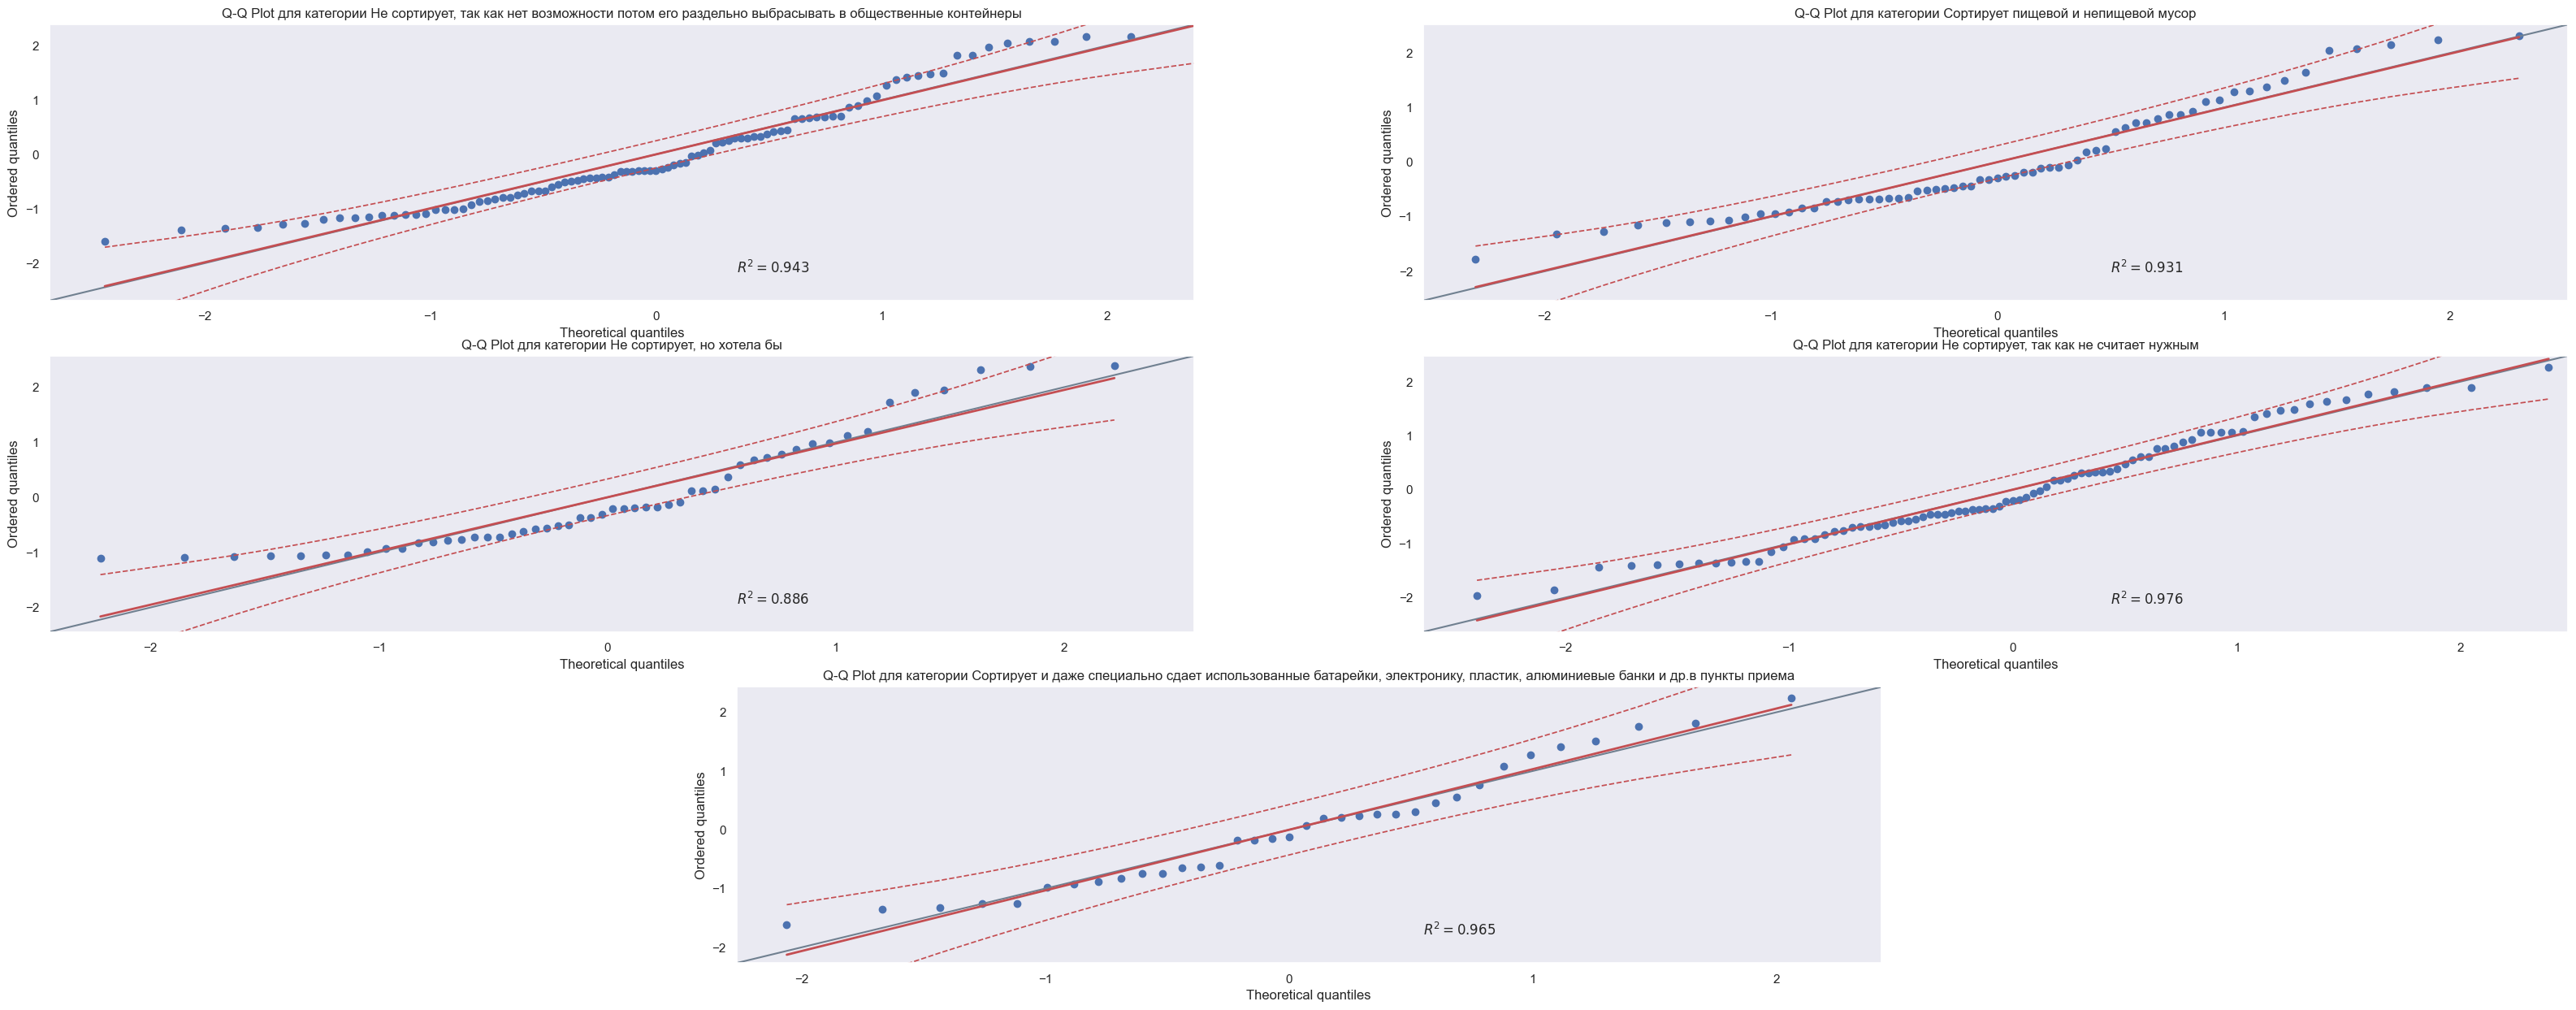

In [1257]:
# fig, axes = plt.subplots(2, 2, figsize = (10, 8), gridspec_kw={'width_ratios': [1, 3]})
# axes[1,1].set_axis_off()

plt.figure(figsize=(40,15))
gs = gridspec.GridSpec(3, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :2])
ax4 = plt.subplot(gs[1, 2:])
ax5 = plt.subplot(gs[2, 1:3])

axes = [ax1, ax2, ax3, ax4, ax5]
sns.set()
categories = last_last_data["ze44"].unique()
for ax, cat in zip(axes, categories):
    mask = last_last_data["ze44"] == cat
    sample = last_last_data.loc[mask, "zf14"]
    pg.qqplot(sample, ax=ax)
    ax.set_title(f"Q-Q Plot для категории {cat}")
    ax.grid(False)


In [1259]:
pg.homoscedasticity(last_last_data, dv="zf14", group="ze44", method='levene')

,W,pval,equal_var
levene,0.049022,0.995472,True


In [1262]:
pg.anova(last_last_data, dv="zf14", between="ze44")

c:\Users\Aleksey Ryabykin\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,ze44,4,325,0.933566,0.444592,0.01136


In [1199]:
good_data['ze'].value_counts()

Нет                     301
Да                       78
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ      4
ОТКАЗ ОТ ОТВЕТА           4
НЕТ ОТВЕТА                0
Name: ze16, dtype: int64

In [1216]:
pivot = np.array([
    # est' auto
    [119, 31, 2, 0],
    # net auto
    [182, 47, 4, 2]
])

st.chi2_contingency(pivot)

(1.3980370832974414,
 0.7059949142758544,
 3,
 array([[118.22222222,  30.63565891,   2.35658915,   0.78552972],
        [182.77777778,  47.36434109,   3.64341085,   1.21447028]]))

In [1203]:
from statsmodels.stats.proportion import proportions_ztest

signicance = 0.05
sample_success_a, sample_size_a = (235, 387)
sample_success_b, sample_size_b = (301, 450)
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

proportions_ztest(count=successes, nobs=samples, alternative="two-sided")

(-1.853182967894532, 0.06385613805552083)

In [1185]:
good_data[good_data['zc9.101a'] == "Нет"]['zf14.12'].value_counts()


Нет           201
Да             19
НЕТ ОТВЕТА      0
Name: zf14.12, dtype: int64

In [1113]:
lr2.coef_

array([ 3.38312576e-01,  1.81889546e-08,  2.24080518e-01, -2.24080518e-01])

In [1114]:
lr2.intercept_

10.117257489733914

In [1119]:
lost = np.log(y_train) - pipe.predict(X_train)

3997    0.758264
4683    0.975293
3811   -0.554960
4774    1.167490
3948    0.423046
          ...   
4663   -0.573638
4699   -0.511017
4719    0.052066
4012    0.365824
4027   -0.251905
Name: zf14, Length: 221, dtype: float64

In [1125]:
st.shapiro(hampel(lost).dropna())

ShapiroResult(statistic=0.9901904463768005, pvalue=0.1396152377128601)

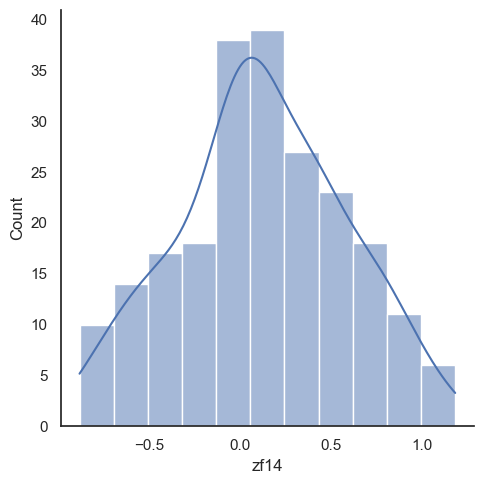

In [1126]:
sns.displot(hampel(lost).dropna(), kde=True)

In [1041]:
reg_data.loc[ind, ["zc1.1"]] = to_fit

In [1042]:
reg_data[reg_data['zc1.1'] == 'nan'].index

Int64Index([], dtype='int64')

In [ ]:
"zc6", "ze11", "zf14"

In [ ]:
re

In [815]:
numerical_data = numerical_data.drop(columns="Объем семьи")

In [816]:
numerical_data = numerical_data.drop(columns=outcome_data)

In [531]:
for col in num_cols_pd:
    tmp = col.astype(str).astype(float).dropna()
    alpha = 0.99
    alpha = 1 - alpha               # significance level = 5%
    n = len(tmp)               # sample sizes
    s2 = np.var(tmp, ddof=1)   # sample variance
    df = n - 1                 # degrees of freedom

    upper = (n - 1) * s2 / st.chi2.ppf(alpha / 2, df)
    lower = (n - 1) * s2 / st.chi2.ppf(1 - alpha / 2, df)
    print(col.name, cols_with_description[col.name], (lower, upper))

z_nfm Количество членов семьи (1.8987403381345396, 2.720151089510589)
zc6 Какова общая полезная площадь жилья у Вашей семьи, то есть сумма площадей жилых комнат, кухни, ванной, туалета, прихожей, кладовых и тому подобного в квартире (доме)? (199.35377536762653, 286.2272845376117)
ze11 Сколько рублей Ваша семья фактически заплатила в течение последних 30 дней за квартиру, включая аренду, и коммунальные услуги? (12203124.292201139, 17608868.183415152)
ze1.1c Сколько всего рублей Ваша семья заплатила в течение последних 7 дней за белый хлеб? (6788.03070421181, 10027.283061413653)
zc1.1 Какова сегодня приблизительно рыночная цена такого жилья, как Ваше? (11973428154879.156, 20843916889527.844)
ze4 Вспомните, сколько примерно денег все члены Вашей семьи израсходовали на питание дома и вне дома в течение последних 30 дней? (139824060.2230035, 201576712.23970467)
zc5 Какую жилую площадь занимает Ваша семья? Сколько квадратных метров составляет площадь только жилых комнат? (124.67964685465468,

C:\Users\Aleksey Ryabykin\AppData\Local\Temp\ipykernel_8896\1064781443.py:1: RuntimeWarning: divide by zero encountered in log
  sns.displot(np.log(income_pd.values), kde=True)


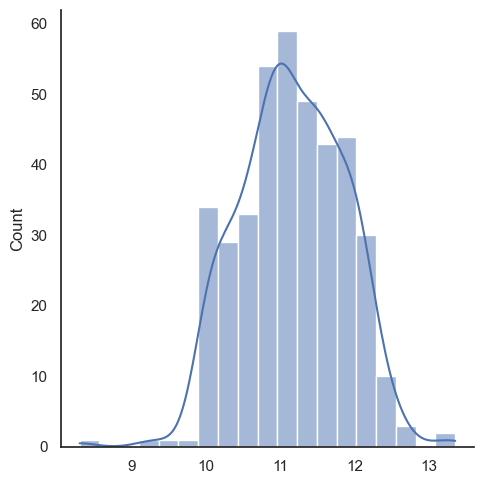

In [505]:
sns.displot(np.log(income_pd.values), kde=True)

In [77]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
 
# Adding legend
ax.legend(wedges, labels,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

In [62]:
plt.show()

In [318]:
for col in good_data.columns:
    if good_data[col].isna().sum() > 0:
        good_data[col] = good_data[col].fillna("НЕТ ОТВЕТА")

In [849]:
good_data.isna().sum()

z_nfm         0
zc1.1         0
zc6           0
zc5           0
zc9.7.2a      0
zc9.7.3a      0
zc9.7.1a      0
zc9.8a        0
zc9.101a      0
zc9.12a       0
ze1.1c       57
ze1.2c      121
ze1.18c      87
ze1.26c      94
ze1.31c      62
ze1.32c     110
ze1.45c      71
ze4           0
ze9.8b       13
ze9.9b       63
ze11         16
ze12          0
ze44          0
ze13.31b     85
ze13.32b    113
ze13.33b     86
ze14          0
ze16          0
zf12_a        0
zf14.8        0
zf14.12       0
zf14          0
dtype: int64

In [506]:
numerical_data

,z_nfm,zc6,ze11,ze1.1c,zc1.1,ze4,zc5,zf14,ze9.8b,outcome_eat,outcome_bread,outcome_mobile,outcome_flat,final_outcome
3748,2.0,48.3,3200.0,45.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,20000.0,17.3,47300.0,400.0,20000.0,45.0,400.0,3200.0,23645.0
3749,5.0,49.4,6000.0,200.0,8000000.0,36400.0,38.0,190215.0,3000.0,36400.0,200.0,3000.0,6000.0,45600.0
3751,1.0,42.4,2800.0,80.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,10000.0,28.5,36000.0,200.0,10000.0,80.0,200.0,2800.0,13080.0
3753,3.0,32.0,6500.0,280.0,7000000.0,30000.0,18.0,90000.0,1000.0,30000.0,280.0,1000.0,6500.0,37780.0
3754,2.0,44.9,7000.0,80.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,18000.0,28.6,48034.0,750.0,18000.0,80.0,750.0,7000.0,25830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,6.0,36.8,7000.0,800.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,50000.0,19.2,ОТКАЗ ОТ ОТВЕТА,3000.0,50000.0,800.0,3000.0,7000.0,60800.0
4777,2.0,64.8,5500.0,90.0,8000000.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,43.8,44300.0,200.0,NaN,90.0,200.0,5500.0,NaN
4778,1.0,75.0,5000.0,40.0,17000000.0,8000.0,37.0,24000.0,300.0,8000.0,40.0,300.0,5000.0,13340.0
4779,6.0,55.0,5800.0,200.0,17000000.0,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,29.0,210000.0,1400.0,NaN,200.0,1400.0,5800.0,NaN


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

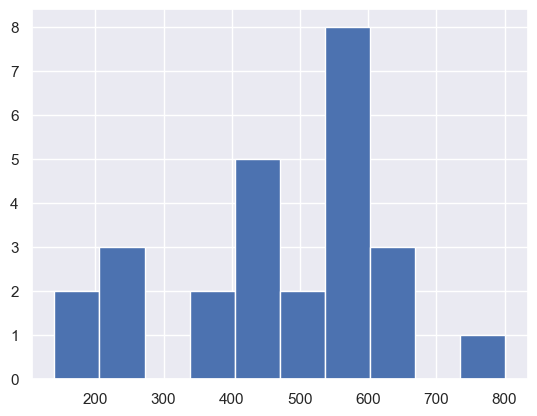

In [63]:
sns.set()
y_c = moscow_data["id_w"].value_counts().hist()

In [53]:
xs = y_c.index.astype(str)
ys = y_c.values

In [57]:
assert len(xs) == len(ys)

In [67]:
import numpy as np

In [70]:
q25, q75 = np.percentile(ys, [25, 75])
bin_width = 2 * (q75 - q25) * len(ys) ** (-1/3)
bins = round((ys.max() - ys.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 5


In [72]:
ys

array([264, 237, 219, 192, 140, 423, 466, 406, 392, 350, 500, 472, 451,
       457, 602, 641, 801, 641, 562, 544, 584, 589, 585, 575, 572, 604],
      dtype=int64)

<BarContainer object of 26 artists>

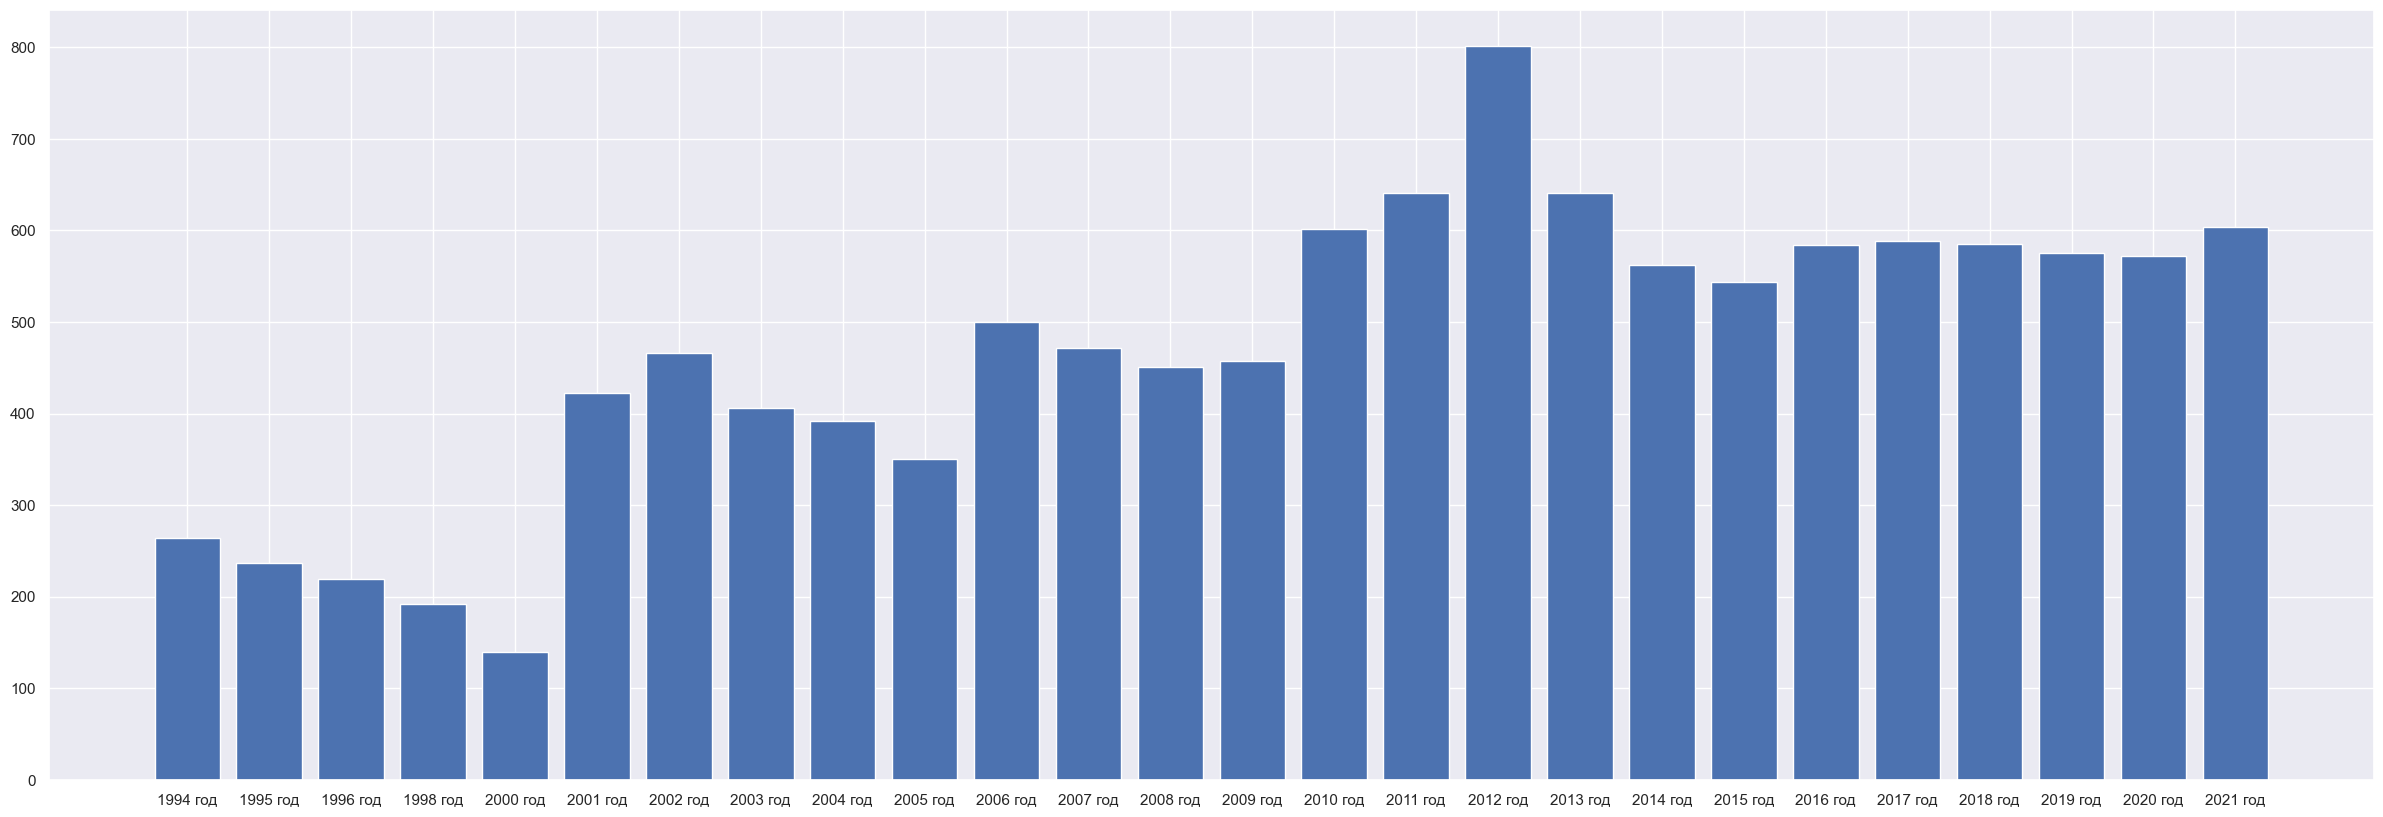

In [75]:
plt.figure(figsize=(30,10))
plt.bar(xs, ys)

In [76]:
moscow_data

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,...,h6913.6,h6923.6,g1.1,g1.2,g2,g3,g4,g5,g6,g7
3364,1994 год,3365.0,138001.0,138001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ЗНАЧИТЕЛЬНО БОЛЕЕ ИСКРЕНЕН И ОТКРЫТ, ЧЕМ БОЛЬШ...",NaN
3365,1994 год,3366.0,138002.0,138002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3366,1994 год,3367.0,138003.0,138003.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3367,1994 год,3368.0,138004.0,138004.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"НЕСООБРАЗИТЕЛЬНЫЙ, НУЖДАЛСЯ В ПОВТОРНОМ ЧТЕНИИ...","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3368,1994 год,3369.0,138005.0,138005.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151842,2021 год,6743.0,13890021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151843,2021 год,6445.0,13890022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ИНОГДА НЕРВНИЧАЛ,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151844,2021 год,5784.0,13890023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151845,2021 год,5785.0,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ


In [16]:
len_data_shape = moscow_data.shape[0]
cols = []
for col in moscow_data.columns:
    is_na_sum = moscow_data[col].isna().sum()
    if is_na_sum < 0.8 * len_data_shape and is_na_sum > 0:
        cols.append(col)

In [17]:
len(cols)

339

In [27]:
cols

['fid_h',
 'gid_h',
 'hid_h',
 'iid_h',
 'jid_h',
 'kid_h',
 'lid_h',
 'mid_h',
 'nid_h',
 'oid_h',
 'pid_h',
 'qid_h',
 'rid_h',
 'sid_h',
 'tid_h',
 'uid_h',
 'vid_h',
 'a3.3',
 'nfm1.o',
 'b1.1',
 'b1.2.1',
 'b1.3',
 'b1.4',
 'b1.5',
 'b2.1',
 'idind2',
 'b2.2.1',
 'b2.3',
 'b2.4',
 'b2.5',
 'b2.9.1',
 'b3.1',
 'idind3',
 'b3.2.1',
 'b3.3',
 'b3.4',
 'b3.5',
 'b3.9.1',
 'b3.9.2',
 'b4.1',
 'idind4',
 'b4.2.1',
 'b4.3',
 'b4.4',
 'b4.5',
 'b4.9.1',
 'b4.9.2',
 'b4.9.3',
 'idind5',
 'b5.2.1',
 'idind6',
 'c1.1',
 'c3',
 'c4',
 'c4.0',
 'c5.1',
 'c7.7',
 'c7.8',
 'c9.1a',
 'c9.1b',
 'c9.1.1a',
 'c9.1.1b',
 'c9.3a',
 'c9.3.1a',
 'c9.3.1b',
 'c9.3.2a',
 'c9.3.2b',
 'c9.3.3a',
 'c9.4a',
 'c9.5a',
 'c9.5b',
 'c9.5.1a',
 'c9.5.1b',
 'c9.5.2a',
 'c9.5.2b',
 'c9.6b',
 'c9.6.0a',
 'c9.6.0b',
 'c9.6.2a',
 'c9.6.3a',
 'c9.6.3b',
 'c9.6.4a',
 'c9.621a',
 'c9.621b',
 'c9.622a',
 'c9.622b',
 'c9.623a',
 'c9.624a',
 'c9.624b',
 'c9.631a',
 'c9.6.5a',
 'c9.7a',
 'c9.7.1a',
 'c9.7.2a',
 'c9.7.3a',
 'c

In [108]:
cols_with_desctiption = {
 "F2": "Сколько денег нужно Вашей семье в месяц, чтобы жить нормально?",
 "C1.1" : "Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?",
"C9.7.0C": "За сколько можно купить сегодня такой же легковой или грузовой автомобиль?",
"C9.7.0B": "Сколько лет легковому или грузовому автомобилю?",
"C9.11C": "За сколько можно купить сегодня такую же дачу или другой дом?",
"C9.12C_price": "За сколько можно купить сегодня такую же квартиру или часть квартиры?",
"D3": "Сколько всего соток земли у Вашей семьи в настоящее время?",
"E7.8B": "Сколько всего рублей Ваша семья заплатила за дом, дачу, квартиру, землю?",
"E8.1B": "Сколько всего рублей Ваша семья заплатила за топливо для заправки автотранспорта, двигателей, генераторов?",
"E12.1": "Назовите сумму задолженности за квартиру и коммунальные услуги",
"E13.72B": "Сколько всего рублей Ваша семья истратила на погашение кредита, возврат ссуд?",
"E13.10B": "Сколько всего рублей Ваша семья истратила на покупку валюты с целью сбережений?",
"E15": "Сколько рублей Ваша семья отдала в долг в течение 30 последних дней?",
"E17": "Сколько рублей Ваша семья отложила в течение последних 30 дней?",
"E22.7B": "Сколько всего рублей заплатили за покупку валюты?",
"F11": "Сколько получила Ваша семья за вычетом налогов и других отчислений в течение последних 30 дней? Если оплата производилась в форме товаров или услуг, оцените, сколько это будет в рублях?",
"F12.3B": "Сколько в рублях пособий по безработице получила Ваша семья в течение последних 30 дней?",
"F12.6BB": "Сколько в рублях дохода по акциям, облигациям, ценным бумагам и другим видам вложения капитала получила Ваша семья в течение последних 30 дней?",
"F13.1B": "Сколько в рублях Ваша семья взяла в кредит, в долг в течение последних 30 дней?",
"F14": "Каким был денежный доход всей Вашей семьи в течение последних 30 дней? Включите сюда все денежные поступления всех членов семьи, в том числе и в валюте, но валюту переведите в рубли",
"F14.1": "Если говорить о последних 12 месяцах, какую часть доходов Вашей семье удалось отложить: дома или на банковских вкладах, в рублях или в валюте. Сколько примерно это будет в процентах от всего дохода семьи",
"F14.13": "Сколько всего денег должны Вашей семье на сегодняшний день (в рублях)?",
"F14.2" : "На сегодняшний день у Вашей семьи есть какие-то денежные долги, не считая долгов по коммунальным платежам?",
"F14.0" : "Сколько Вашей семье удалось накопить, то есть какие сбережения есть у Вашей семьи на сегодняшний день - дома или на банковских вкладах, в рублях или в валюте, или в ценных бумагах? Оцените, сколько это будет в рублях.",
"F14.3" : "Сколько всего денег должна Ваша семья? Если долги исчисляются в долларах, то переведите эту сумму в рубли",
"F23.7B" : "Сколько всего в рублях в течение последних 12 месяцев Ваше домохозяйство истратило на оплату общежития или снимаемого жилья?"
}

In [114]:
cols_with_desctiption = {k.lower(): v for k, v in cols_with_desctiption.items()}

In [116]:
cols_with_desctiption

{'f2': 'Сколько денег нужно Вашей семье в месяц, чтобы жить нормально?',
 'c1.1': 'Какова сегодня приблизительно рыночная цена такого жилья, как Ваше?',
 'c9.7.0c': 'За сколько можно купить сегодня такой же легковой или грузовой автомобиль?',
 'c9.7.0b': 'Сколько лет легковому или грузовому автомобилю?',
 'c9.11c': 'За сколько можно купить сегодня такую же дачу или другой дом?',
 'c9.12c_price': 'За сколько можно купить сегодня такую же квартиру или часть квартиры?',
 'd3': 'Сколько всего соток земли у Вашей семьи в настоящее время?',
 'e7.8b': 'Сколько всего рублей Ваша семья заплатила за дом, дачу, квартиру, землю?',
 'e8.1b': 'Сколько всего рублей Ваша семья заплатила за топливо для заправки автотранспорта, двигателей, генераторов?',
 'e12.1': 'Назовите сумму задолженности за квартиру и коммунальные услуги',
 'e13.72b': 'Сколько всего рублей Ваша семья истратила на погашение кредита, возврат ссуд?',
 'e13.10b': 'Сколько всего рублей Ваша семья истратила на покупку валюты с целью сбе

In [120]:
moscow_data.to_csv("./data/moscow.csv")
moscow_oblast_data.to_csv("./data/moscow_oblast.csv")

In [105]:
for column in moscow_data.columns:
    if moscow_data[column].dtype == "category":
        moscow_data[column] = moscow_data[column].astype(str)

In [106]:
moscow_data

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,...,h6913.6,h6923.6,g1.1,g1.2,g2,g3,g4,g5,g6,g7
3364,1994 год,3365.0,138001.0,138001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ЗНАЧИТЕЛЬНО БОЛЕЕ ИСКРЕНЕН И ОТКРЫТ, ЧЕМ БОЛЬШ...",nan
3365,1994 год,3366.0,138002.0,138002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",nan
3366,1994 год,3367.0,138003.0,138003.0,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",nan
3367,1994 год,3368.0,138004.0,138004.0,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"НЕСООБРАЗИТЕЛЬНЫЙ, НУЖДАЛСЯ В ПОВТОРНОМ ЧТЕНИИ...","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",nan
3368,1994 год,3369.0,138005.0,138005.0,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151842,2021 год,6743.0,13890021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151843,2021 год,6445.0,13890022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ИНОГДА НЕРВНИЧАЛ,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151844,2021 год,5784.0,13890023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151845,2021 год,5785.0,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ


In [122]:
moscow_data.shape

(12269, 2002)

In [123]:
check = pd.read_csv('data/moscow.csv', index_col=[0], low_memory=False)
check

,id_w,redid_h,id_h,aid_h,bid_h,cid_h,did_h,eid_h,fid_h,gid_h,...,h6913.6,h6923.6,g1.1,g1.2,g2,g3,g4,g5,g6,g7
3364,1994 год,3365.0,138001.0,138001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ЗНАЧИТЕЛЬНО БОЛЕЕ ИСКРЕНЕН И ОТКРЫТ, ЧЕМ БОЛЬШ...",NaN
3365,1994 год,3366.0,138002.0,138002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3366,1994 год,3367.0,138003.0,138003.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3367,1994 год,3368.0,138004.0,138004.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"НЕСООБРАЗИТЕЛЬНЫЙ, НУЖДАЛСЯ В ПОВТОРНОМ ЧТЕНИИ...","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3368,1994 год,3369.0,138005.0,138005.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151842,2021 год,6743.0,13890021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151843,2021 год,6445.0,13890022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ИНОГДА НЕРВНИЧАЛ,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151844,2021 год,5784.0,13890023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
151845,2021 год,5785.0,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ


In [25]:
from sklearn.datasets import load_boston
data =  load_boston()

In [28]:
dataset = data.data
target = data.target

df = pd.DataFrame(dataset)

In [33]:
data["region"]

KeyError: 'region'

In [32]:
df[df[1] == 12.5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
68,0.13554,12.5,6.07,0.0,0.409,5.594,36.8,6.4980,4.0,345.0,18.9,396.90,13.09
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79


In [10]:
dataset = data[data["region"] == 'Московская область' | data["region"] == 'Москва']

TypeError: unsupported operand type(s) for |: 'str' and 'Categorical'

In [1]:
data

NameError: name 'data' is not defined

In [24]:
import camelot

In [25]:
check = camelot.read_pdf('./БД_2021_hh_codebook.pdf')

In [26]:
check

<TableList n=0>